In [1]:
#from EKFsimplev2 import ExtendedKalmanFilter
import control
import matplotlib as plt
import time


Connection du thymio

In [2]:
!pip install --upgrade tdmclient

Création du node de controle

In [3]:
from tdmclient import ClientAsync
client = ClientAsync()
node = await client.wait_for_node()
await node.lock()

Node 19b33216-bf6c-43ca-99c3-fd3e41d0251a

Initialisation des librairies utilisées

In [4]:
from scipy.signal import find_peaks
import numpy as np
from tqdm import tqdm

Initialisation du kalman filter pour le detecteur de vitesse

In [5]:
from timer import RepeatedTimer

Essai de kalman en direct

In [6]:
from kalman_step_astolfi import kalman_step_complet
from EKF_astolfi import ExtendedKalmanFilterAstolfi
import time
import matplotlib.pyplot as plt

[None, None, None, 0, 0]
temps entre samples:  0.6225287914276123
0.0
0.0


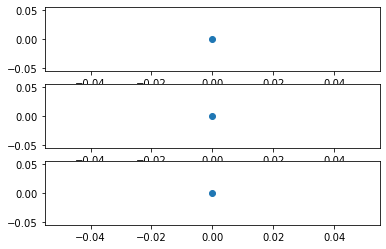

[None, None, None, 44, 48]
temps entre samples:  0.9557161331176758
[0. 0.]
[0. 0.]


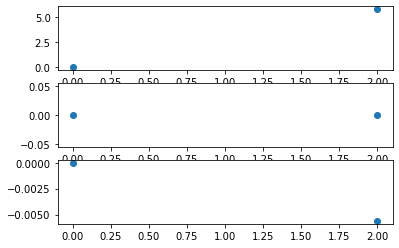

[None, None, None, 35, 56]
temps entre samples:  1.0624616146087646
[0. 0. 0.]
[ 0.          0.         -0.19255049]


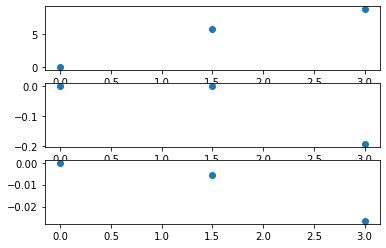

[None, None, None, 41, 49]
temps entre samples:  0.9859142303466797
[ 0.          0.          0.         -0.20546131]
[ 0.          0.         -0.19255049 -1.03692308]


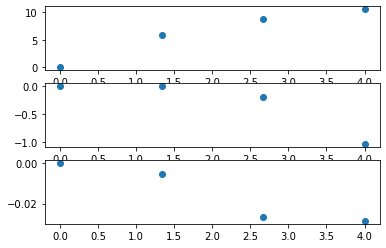

[None, None, None, 59, 59]
temps entre samples:  1.046856164932251
[ 0.          0.          0.         -0.20546131 -1.29928836]
[ 0.          0.         -0.19255049 -1.03692308 -1.76690759]


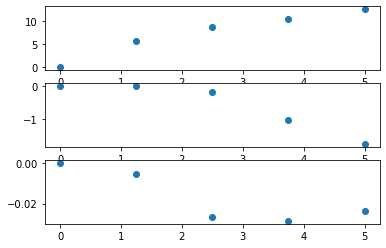

[None, None, None, 46, 52]
temps entre samples:  0.9847571849822998
[ 0.          0.          0.         -0.20546131 -1.29928836 -3.17200439]
[ 0.          0.         -0.19255049 -1.03692308 -1.76690759 -2.47546372]


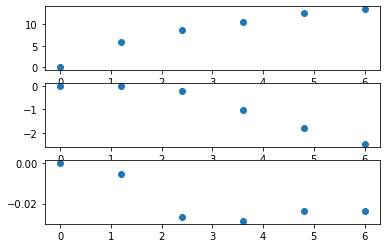

[None, None, None, 40, 53]
temps entre samples:  0.9916167259216309
[ 0.          0.          0.         -0.20546131 -1.29928836 -3.17200439
 -6.12435023]
[ 0.          0.         -0.19255049 -1.03692308 -1.76690759 -2.47546372
 -3.53571716]


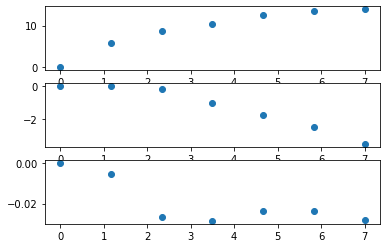

[None, None, None, 40, 59]
temps entre samples:  1.064993143081665
[  0.           0.           0.          -0.20546131  -1.29928836
  -3.17200439  -6.12435023 -11.00691919]
[ 0.          0.         -0.19255049 -1.03692308 -1.76690759 -2.47546372
 -3.53571716 -5.19173709]


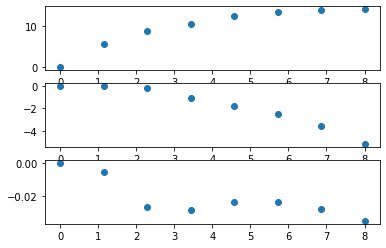

[None, None, None, 56, 48]
temps entre samples:  0.9877231121063232
[  0.           0.           0.          -0.20546131  -1.29928836
  -3.17200439  -6.12435023 -11.00691919 -14.78619978]
[ 0.          0.         -0.19255049 -1.03692308 -1.76690759 -2.47546372
 -3.53571716 -5.19173709 -6.2849092 ]


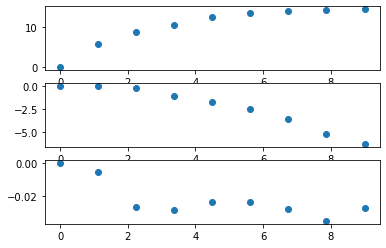

[None, None, None, 24, 41]
temps entre samples:  0.9862551689147949
[  0.           0.           0.          -0.20546131  -1.29928836
  -3.17200439  -6.12435023 -11.00691919 -14.78619978 -22.06277661]
[ 0.          0.         -0.19255049 -1.03692308 -1.76690759 -2.47546372
 -3.53571716 -5.19173709 -6.2849092  -6.93481606]


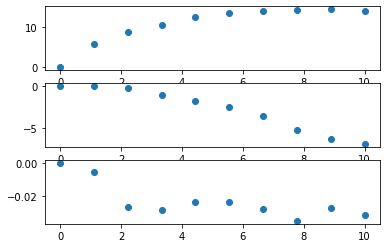

[None, None, None, 53, 43]
temps entre samples:  0.9748616218566895
[  0.           0.           0.          -0.20546131  -1.29928836
  -3.17200439  -6.12435023 -11.00691919 -14.78619978 -22.06277661
 -26.54495199]
[ 0.          0.         -0.19255049 -1.03692308 -1.76690759 -2.47546372
 -3.53571716 -5.19173709 -6.2849092  -6.93481606 -7.49661478]


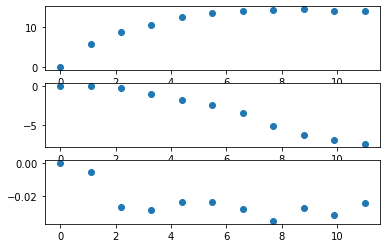

[None, None, None, 43, 45]
temps entre samples:  0.9541385173797607
[  0.           0.           0.          -0.20546131  -1.29928836
  -3.17200439  -6.12435023 -11.00691919 -14.78619978 -22.06277661
 -26.54495199 -33.23756499]
[ 0.          0.         -0.19255049 -1.03692308 -1.76690759 -2.47546372
 -3.53571716 -5.19173709 -6.2849092  -6.93481606 -7.49661478 -7.4305911 ]


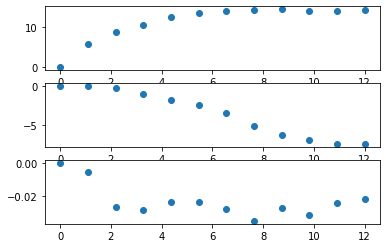

[None, None, None, 73, 41]
temps entre samples:  1.0522172451019287
[  0.           0.           0.          -0.20546131  -1.29928836
  -3.17200439  -6.12435023 -11.00691919 -14.78619978 -22.06277661
 -26.54495199 -33.23756499 -34.76124742]
[ 0.          0.         -0.19255049 -1.03692308 -1.76690759 -2.47546372
 -3.53571716 -5.19173709 -6.2849092  -6.93481606 -7.49661478 -7.4305911
 -6.4489724 ]


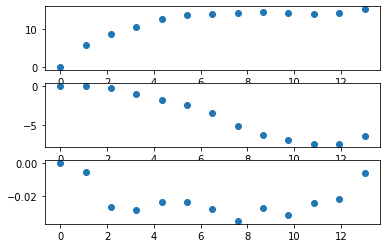

[None, None, None, 49, 47]
temps entre samples:  1.004349708557129
[  0.           0.           0.          -0.20546131  -1.29928836
  -3.17200439  -6.12435023 -11.00691919 -14.78619978 -22.06277661
 -26.54495199 -33.23756499 -34.76124742 -40.82738958]
[ 0.          0.         -0.19255049 -1.03692308 -1.76690759 -2.47546372
 -3.53571716 -5.19173709 -6.2849092  -6.93481606 -7.49661478 -7.4305911
 -6.4489724  -4.99765282]


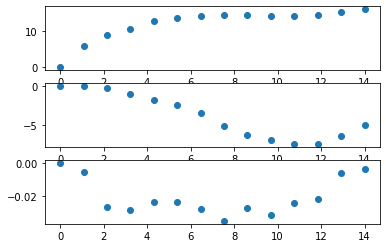

[None, None, None, 50, 55]
temps entre samples:  1.0790185928344727
[  0.           0.           0.          -0.20546131  -1.29928836
  -3.17200439  -6.12435023 -11.00691919 -14.78619978 -22.06277661
 -26.54495199 -33.23756499 -34.76124742 -40.82738958 -47.62831525]
[ 0.          0.         -0.19255049 -1.03692308 -1.76690759 -2.47546372
 -3.53571716 -5.19173709 -6.2849092  -6.93481606 -7.49661478 -7.4305911
 -6.4489724  -4.99765282 -5.30101425]


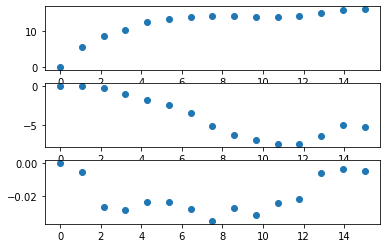

[None, None, None, 44, 48]
temps entre samples:  1.005509853363037
[  0.           0.           0.          -0.20546131  -1.29928836
  -3.17200439  -6.12435023 -11.00691919 -14.78619978 -22.06277661
 -26.54495199 -33.23756499 -34.76124742 -40.82738958 -47.62831525
 -53.73864378]
[ 0.          0.         -0.19255049 -1.03692308 -1.76690759 -2.47546372
 -3.53571716 -5.19173709 -6.2849092  -6.93481606 -7.49661478 -7.4305911
 -6.4489724  -4.99765282 -5.30101425 -5.90000537]


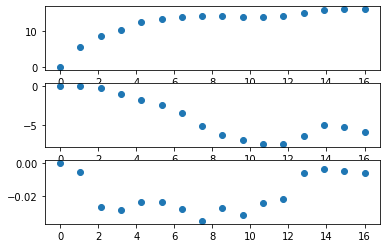

[None, None, None, 62, 46]
temps entre samples:  1.050394058227539
[  0.           0.           0.          -0.20546131  -1.29928836
  -3.17200439  -6.12435023 -11.00691919 -14.78619978 -22.06277661
 -26.54495199 -33.23756499 -34.76124742 -40.82738958 -47.62831525
 -53.73864378 -55.55532228]
[ 0.          0.         -0.19255049 -1.03692308 -1.76690759 -2.47546372
 -3.53571716 -5.19173709 -6.2849092  -6.93481606 -7.49661478 -7.4305911
 -6.4489724  -4.99765282 -5.30101425 -5.90000537 -5.4110102 ]


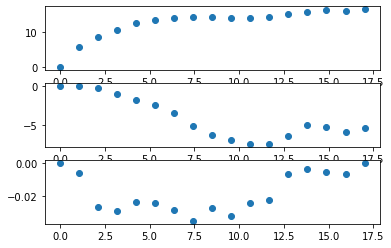

[None, None, None, 45, 41]
temps entre samples:  0.9905736446380615
[  0.           0.           0.          -0.20546131  -1.29928836
  -3.17200439  -6.12435023 -11.00691919 -14.78619978 -22.06277661
 -26.54495199 -33.23756499 -34.76124742 -40.82738958 -47.62831525
 -53.73864378 -55.55532228 -59.68864073]
[ 0.          0.         -0.19255049 -1.03692308 -1.76690759 -2.47546372
 -3.53571716 -5.19173709 -6.2849092  -6.93481606 -7.49661478 -7.4305911
 -6.4489724  -4.99765282 -5.30101425 -5.90000537 -5.4110102  -4.3545195 ]


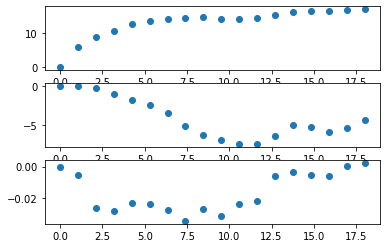

[None, None, None, 42, 47]
temps entre samples:  0.9997642040252686
[  0.           0.           0.          -0.20546131  -1.29928836
  -3.17200439  -6.12435023 -11.00691919 -14.78619978 -22.06277661
 -26.54495199 -33.23756499 -34.76124742 -40.82738958 -47.62831525
 -53.73864378 -55.55532228 -59.68864073 -65.76917685]
[ 0.          0.         -0.19255049 -1.03692308 -1.76690759 -2.47546372
 -3.53571716 -5.19173709 -6.2849092  -6.93481606 -7.49661478 -7.4305911
 -6.4489724  -4.99765282 -5.30101425 -5.90000537 -5.4110102  -4.3545195
 -4.38577288]


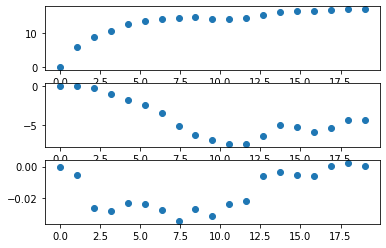

[None, None, None, 51, 58]
temps entre samples:  1.0161058902740479
[  0.           0.           0.          -0.20546131  -1.29928836
  -3.17200439  -6.12435023 -11.00691919 -14.78619978 -22.06277661
 -26.54495199 -33.23756499 -34.76124742 -40.82738958 -47.62831525
 -53.73864378 -55.55532228 -59.68864073 -65.76917685 -73.01164959]
[ 0.          0.         -0.19255049 -1.03692308 -1.76690759 -2.47546372
 -3.53571716 -5.19173709 -6.2849092  -6.93481606 -7.49661478 -7.4305911
 -6.4489724  -4.99765282 -5.30101425 -5.90000537 -5.4110102  -4.3545195
 -4.38577288 -5.07498718]


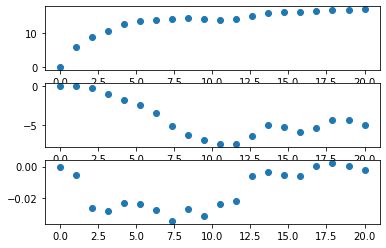

[None, None, None, 56, 45]
temps entre samples:  1.0625131130218506
[  0.           0.           0.          -0.20546131  -1.29928836
  -3.17200439  -6.12435023 -11.00691919 -14.78619978 -22.06277661
 -26.54495199 -33.23756499 -34.76124742 -40.82738958 -47.62831525
 -53.73864378 -55.55532228 -59.68864073 -65.76917685 -73.01164959
 -74.54440442]
[ 0.          0.         -0.19255049 -1.03692308 -1.76690759 -2.47546372
 -3.53571716 -5.19173709 -6.2849092  -6.93481606 -7.49661478 -7.4305911
 -6.4489724  -4.99765282 -5.30101425 -5.90000537 -5.4110102  -4.3545195
 -4.38577288 -5.07498718 -4.96885463]


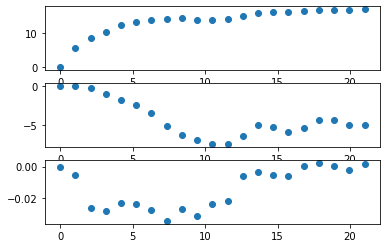

[None, None, None, 50, 44]
temps entre samples:  1.0021028518676758
[  0.           0.           0.          -0.20546131  -1.29928836
  -3.17200439  -6.12435023 -11.00691919 -14.78619978 -22.06277661
 -26.54495199 -33.23756499 -34.76124742 -40.82738958 -47.62831525
 -53.73864378 -55.55532228 -59.68864073 -65.76917685 -73.01164959
 -74.54440442 -77.54304552]
[ 0.          0.         -0.19255049 -1.03692308 -1.76690759 -2.47546372
 -3.53571716 -5.19173709 -6.2849092  -6.93481606 -7.49661478 -7.4305911
 -6.4489724  -4.99765282 -5.30101425 -5.90000537 -5.4110102  -4.3545195
 -4.38577288 -5.07498718 -4.96885463 -4.00637261]


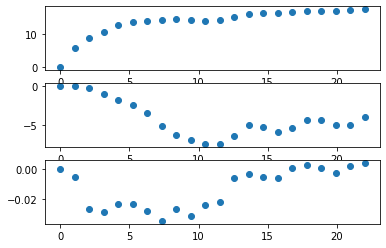

[None, None, None, 45, 49]
temps entre samples:  0.9889650344848633
[  0.           0.           0.          -0.20546131  -1.29928836
  -3.17200439  -6.12435023 -11.00691919 -14.78619978 -22.06277661
 -26.54495199 -33.23756499 -34.76124742 -40.82738958 -47.62831525
 -53.73864378 -55.55532228 -59.68864073 -65.76917685 -73.01164959
 -74.54440442 -77.54304552 -83.43658001]
[ 0.          0.         -0.19255049 -1.03692308 -1.76690759 -2.47546372
 -3.53571716 -5.19173709 -6.2849092  -6.93481606 -7.49661478 -7.4305911
 -6.4489724  -4.99765282 -5.30101425 -5.90000537 -5.4110102  -4.3545195
 -4.38577288 -5.07498718 -4.96885463 -4.00637261 -3.86462358]


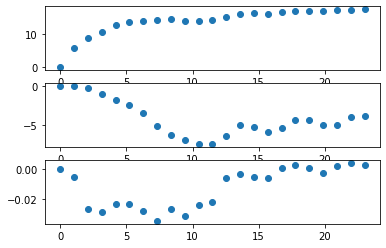

[None, None, None, 48, 56]
temps entre samples:  0.941838264465332
[  0.           0.           0.          -0.20546131  -1.29928836
  -3.17200439  -6.12435023 -11.00691919 -14.78619978 -22.06277661
 -26.54495199 -33.23756499 -34.76124742 -40.82738958 -47.62831525
 -53.73864378 -55.55532228 -59.68864073 -65.76917685 -73.01164959
 -74.54440442 -77.54304552 -83.43658001 -90.6524005 ]
[ 0.          0.         -0.19255049 -1.03692308 -1.76690759 -2.47546372
 -3.53571716 -5.19173709 -6.2849092  -6.93481606 -7.49661478 -7.4305911
 -6.4489724  -4.99765282 -5.30101425 -5.90000537 -5.4110102  -4.3545195
 -4.38577288 -5.07498718 -4.96885463 -4.00637261 -3.86462358 -4.55147601]


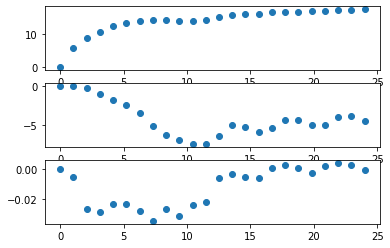

[None, None, None, 42, 61]
temps entre samples:  0.9553196430206299
[   0.            0.            0.           -0.20546131   -1.29928836
   -3.17200439   -6.12435023  -11.00691919  -14.78619978  -22.06277661
  -26.54495199  -33.23756499  -34.76124742  -40.82738958  -47.62831525
  -53.73864378  -55.55532228  -59.68864073  -65.76917685  -73.01164959
  -74.54440442  -77.54304552  -83.43658001  -90.6524005  -102.68399262]
[ 0.          0.         -0.19255049 -1.03692308 -1.76690759 -2.47546372
 -3.53571716 -5.19173709 -6.2849092  -6.93481606 -7.49661478 -7.4305911
 -6.4489724  -4.99765282 -5.30101425 -5.90000537 -5.4110102  -4.3545195
 -4.38577288 -5.07498718 -4.96885463 -4.00637261 -3.86462358 -4.55147601
 -6.12243112]


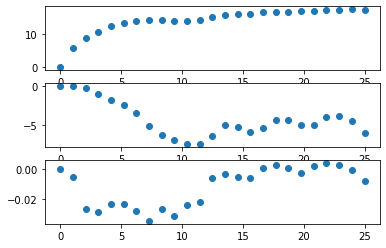

[None, None, None, 44, 47]
temps entre samples:  0.9704272747039795
[   0.            0.            0.           -0.20546131   -1.29928836
   -3.17200439   -6.12435023  -11.00691919  -14.78619978  -22.06277661
  -26.54495199  -33.23756499  -34.76124742  -40.82738958  -47.62831525
  -53.73864378  -55.55532228  -59.68864073  -65.76917685  -73.01164959
  -74.54440442  -77.54304552  -83.43658001  -90.6524005  -102.68399262
 -108.9155198 ]
[ 0.          0.         -0.19255049 -1.03692308 -1.76690759 -2.47546372
 -3.53571716 -5.19173709 -6.2849092  -6.93481606 -7.49661478 -7.4305911
 -6.4489724  -4.99765282 -5.30101425 -5.90000537 -5.4110102  -4.3545195
 -4.38577288 -5.07498718 -4.96885463 -4.00637261 -3.86462358 -4.55147601
 -6.12243112 -7.43505272]


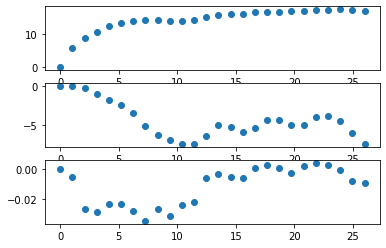

[None, None, None, 35, 58]
temps entre samples:  0.9710583686828613
[   0.            0.            0.           -0.20546131   -1.29928836
   -3.17200439   -6.12435023  -11.00691919  -14.78619978  -22.06277661
  -26.54495199  -33.23756499  -34.76124742  -40.82738958  -47.62831525
  -53.73864378  -55.55532228  -59.68864073  -65.76917685  -73.01164959
  -74.54440442  -77.54304552  -83.43658001  -90.6524005  -102.68399262
 -108.9155198  -124.83420028]
[ 0.          0.         -0.19255049 -1.03692308 -1.76690759 -2.47546372
 -3.53571716 -5.19173709 -6.2849092  -6.93481606 -7.49661478 -7.4305911
 -6.4489724  -4.99765282 -5.30101425 -5.90000537 -5.4110102  -4.3545195
 -4.38577288 -5.07498718 -4.96885463 -4.00637261 -3.86462358 -4.55147601
 -6.12243112 -7.43505272 -8.87791146]


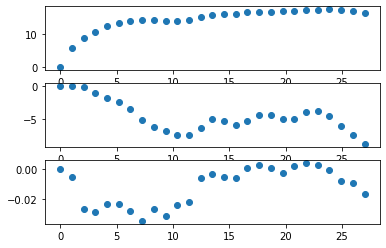

[None, None, None, 67, 59]
temps entre samples:  1.0607938766479492
[   0.            0.            0.           -0.20546131   -1.29928836
   -3.17200439   -6.12435023  -11.00691919  -14.78619978  -22.06277661
  -26.54495199  -33.23756499  -34.76124742  -40.82738958  -47.62831525
  -53.73864378  -55.55532228  -59.68864073  -65.76917685  -73.01164959
  -74.54440442  -77.54304552  -83.43658001  -90.6524005  -102.68399262
 -108.9155198  -124.83420028 -129.76099915]
[ 0.          0.         -0.19255049 -1.03692308 -1.76690759 -2.47546372
 -3.53571716 -5.19173709 -6.2849092  -6.93481606 -7.49661478 -7.4305911
 -6.4489724  -4.99765282 -5.30101425 -5.90000537 -5.4110102  -4.3545195
 -4.38577288 -5.07498718 -4.96885463 -4.00637261 -3.86462358 -4.55147601
 -6.12243112 -7.43505272 -8.87791146 -9.93107035]


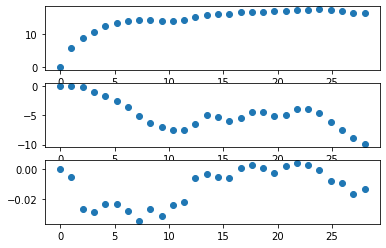

[None, None, None, 52, 55]
temps entre samples:  1.0637767314910889
[   0.            0.            0.           -0.20546131   -1.29928836
   -3.17200439   -6.12435023  -11.00691919  -14.78619978  -22.06277661
  -26.54495199  -33.23756499  -34.76124742  -40.82738958  -47.62831525
  -53.73864378  -55.55532228  -59.68864073  -65.76917685  -73.01164959
  -74.54440442  -77.54304552  -83.43658001  -90.6524005  -102.68399262
 -108.9155198  -124.83420028 -129.76099915 -140.57713415]
[ 0.          0.         -0.19255049 -1.03692308 -1.76690759 -2.47546372
 -3.53571716 -5.19173709 -6.2849092  -6.93481606 -7.49661478 -7.4305911
 -6.4489724  -4.99765282 -5.30101425 -5.90000537 -5.4110102  -4.3545195
 -4.38577288 -5.07498718 -4.96885463 -4.00637261 -3.86462358 -4.55147601
 -6.12243112 -7.43505272 -8.87791146 -9.93107035 -9.97590144]


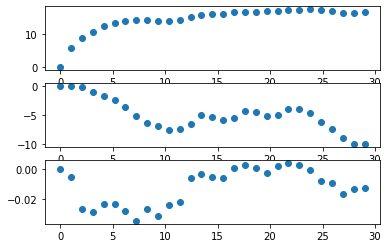

[None, None, None, 43, 53]
temps entre samples:  1.0337507724761963
[   0.            0.            0.           -0.20546131   -1.29928836
   -3.17200439   -6.12435023  -11.00691919  -14.78619978  -22.06277661
  -26.54495199  -33.23756499  -34.76124742  -40.82738958  -47.62831525
  -53.73864378  -55.55532228  -59.68864073  -65.76917685  -73.01164959
  -74.54440442  -77.54304552  -83.43658001  -90.6524005  -102.68399262
 -108.9155198  -124.83420028 -129.76099915 -140.57713415 -153.98339366]
[  0.           0.          -0.19255049  -1.03692308  -1.76690759
  -2.47546372  -3.53571716  -5.19173709  -6.2849092   -6.93481606
  -7.49661478  -7.4305911   -6.4489724   -4.99765282  -5.30101425
  -5.90000537  -5.4110102   -4.3545195   -4.38577288  -5.07498718
  -4.96885463  -4.00637261  -3.86462358  -4.55147601  -6.12243112
  -7.43505272  -8.87791146  -9.93107035  -9.97590144 -10.89067288]


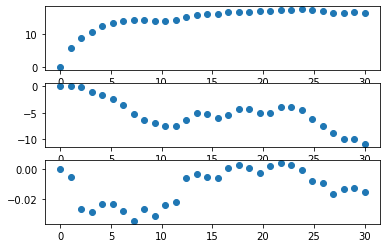

[None, None, None, 48, 53]
temps entre samples:  0.9906220436096191
[   0.            0.            0.           -0.20546131   -1.29928836
   -3.17200439   -6.12435023  -11.00691919  -14.78619978  -22.06277661
  -26.54495199  -33.23756499  -34.76124742  -40.82738958  -47.62831525
  -53.73864378  -55.55532228  -59.68864073  -65.76917685  -73.01164959
  -74.54440442  -77.54304552  -83.43658001  -90.6524005  -102.68399262
 -108.9155198  -124.83420028 -129.76099915 -140.57713415 -153.98339366
 -165.46687849]
[  0.           0.          -0.19255049  -1.03692308  -1.76690759
  -2.47546372  -3.53571716  -5.19173709  -6.2849092   -6.93481606
  -7.49661478  -7.4305911   -6.4489724   -4.99765282  -5.30101425
  -5.90000537  -5.4110102   -4.3545195   -4.38577288  -5.07498718
  -4.96885463  -4.00637261  -3.86462358  -4.55147601  -6.12243112
  -7.43505272  -8.87791146  -9.93107035  -9.97590144 -10.89067288
 -11.84009794]


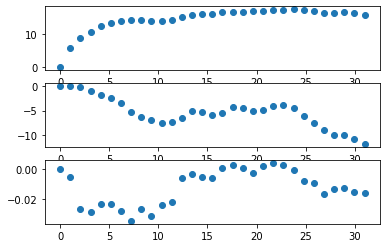

[None, None, None, 45, 42]
temps entre samples:  1.023880958557129
[   0.            0.            0.           -0.20546131   -1.29928836
   -3.17200439   -6.12435023  -11.00691919  -14.78619978  -22.06277661
  -26.54495199  -33.23756499  -34.76124742  -40.82738958  -47.62831525
  -53.73864378  -55.55532228  -59.68864073  -65.76917685  -73.01164959
  -74.54440442  -77.54304552  -83.43658001  -90.6524005  -102.68399262
 -108.9155198  -124.83420028 -129.76099915 -140.57713415 -153.98339366
 -165.46687849 -174.05475533]
[  0.           0.          -0.19255049  -1.03692308  -1.76690759
  -2.47546372  -3.53571716  -5.19173709  -6.2849092   -6.93481606
  -7.49661478  -7.4305911   -6.4489724   -4.99765282  -5.30101425
  -5.90000537  -5.4110102   -4.3545195   -4.38577288  -5.07498718
  -4.96885463  -4.00637261  -3.86462358  -4.55147601  -6.12243112
  -7.43505272  -8.87791146  -9.93107035  -9.97590144 -10.89067288
 -11.84009794 -11.99790691]


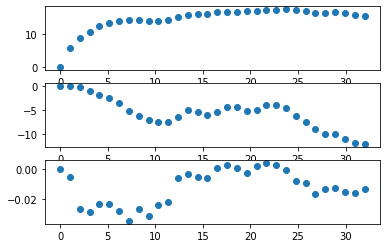

[None, None, None, 35, 54]
temps entre samples:  0.9640145301818848
[   0.            0.            0.           -0.20546131   -1.29928836
   -3.17200439   -6.12435023  -11.00691919  -14.78619978  -22.06277661
  -26.54495199  -33.23756499  -34.76124742  -40.82738958  -47.62831525
  -53.73864378  -55.55532228  -59.68864073  -65.76917685  -73.01164959
  -74.54440442  -77.54304552  -83.43658001  -90.6524005  -102.68399262
 -108.9155198  -124.83420028 -129.76099915 -140.57713415 -153.98339366
 -165.46687849 -174.05475533 -192.80324556]
[  0.           0.          -0.19255049  -1.03692308  -1.76690759
  -2.47546372  -3.53571716  -5.19173709  -6.2849092   -6.93481606
  -7.49661478  -7.4305911   -6.4489724   -4.99765282  -5.30101425
  -5.90000537  -5.4110102   -4.3545195   -4.38577288  -5.07498718
  -4.96885463  -4.00637261  -3.86462358  -4.55147601  -6.12243112
  -7.43505272  -8.87791146  -9.93107035  -9.97590144 -10.89067288
 -11.84009794 -11.99790691 -12.88713474]


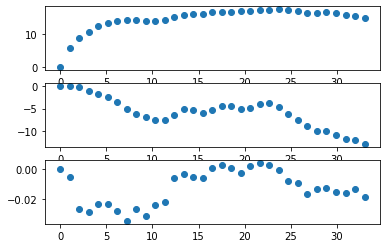

[None, None, None, 45, 48]
temps entre samples:  0.9847164154052734
[   0.            0.            0.           -0.20546131   -1.29928836
   -3.17200439   -6.12435023  -11.00691919  -14.78619978  -22.06277661
  -26.54495199  -33.23756499  -34.76124742  -40.82738958  -47.62831525
  -53.73864378  -55.55532228  -59.68864073  -65.76917685  -73.01164959
  -74.54440442  -77.54304552  -83.43658001  -90.6524005  -102.68399262
 -108.9155198  -124.83420028 -129.76099915 -140.57713415 -153.98339366
 -165.46687849 -174.05475533 -192.80324556 -204.58059621]
[  0.           0.          -0.19255049  -1.03692308  -1.76690759
  -2.47546372  -3.53571716  -5.19173709  -6.2849092   -6.93481606
  -7.49661478  -7.4305911   -6.4489724   -4.99765282  -5.30101425
  -5.90000537  -5.4110102   -4.3545195   -4.38577288  -5.07498718
  -4.96885463  -4.00637261  -3.86462358  -4.55147601  -6.12243112
  -7.43505272  -8.87791146  -9.93107035  -9.97590144 -10.89067288
 -11.84009794 -11.99790691 -12.88713474 -14.00770198

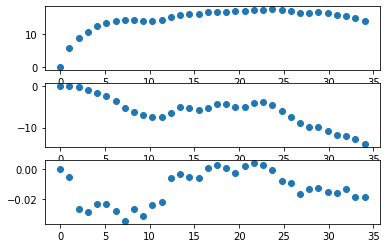

[None, None, None, 79, 52]
temps entre samples:  1.0517668724060059
[ 0.00000000e+00  0.00000000e+00  0.00000000e+00 -2.05461314e-01
 -1.29928836e+00 -3.17200439e+00 -6.12435023e+00 -1.10069192e+01
 -1.47861998e+01 -2.20627766e+01 -2.65449520e+01 -3.32375650e+01
 -3.47612474e+01 -4.08273896e+01 -4.76283152e+01 -5.37386438e+01
 -5.55553223e+01 -5.96886407e+01 -6.57691769e+01 -7.30116496e+01
 -7.45444044e+01 -7.75430455e+01 -8.34365800e+01 -9.06524005e+01
 -1.02683993e+02 -1.08915520e+02 -1.24834200e+02 -1.29760999e+02
 -1.40577134e+02 -1.53983394e+02 -1.65466878e+02 -1.74054755e+02
 -1.92803246e+02 -2.04580596e+02 -2.05512423e+02]
[  0.           0.          -0.19255049  -1.03692308  -1.76690759
  -2.47546372  -3.53571716  -5.19173709  -6.2849092   -6.93481606
  -7.49661478  -7.4305911   -6.4489724   -4.99765282  -5.30101425
  -5.90000537  -5.4110102   -4.3545195   -4.38577288  -5.07498718
  -4.96885463  -4.00637261  -3.86462358  -4.55147601  -6.12243112
  -7.43505272  -8.87791146  -9.9

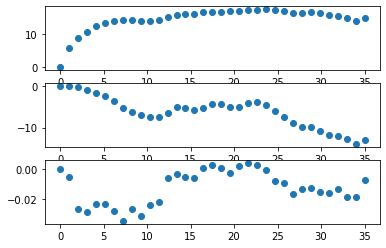

[None, None, None, 45, 60]
temps entre samples:  1.0129003524780273
[ 0.00000000e+00  0.00000000e+00  0.00000000e+00 -2.05461314e-01
 -1.29928836e+00 -3.17200439e+00 -6.12435023e+00 -1.10069192e+01
 -1.47861998e+01 -2.20627766e+01 -2.65449520e+01 -3.32375650e+01
 -3.47612474e+01 -4.08273896e+01 -4.76283152e+01 -5.37386438e+01
 -5.55553223e+01 -5.96886407e+01 -6.57691769e+01 -7.30116496e+01
 -7.45444044e+01 -7.75430455e+01 -8.34365800e+01 -9.06524005e+01
 -1.02683993e+02 -1.08915520e+02 -1.24834200e+02 -1.29760999e+02
 -1.40577134e+02 -1.53983394e+02 -1.65466878e+02 -1.74054755e+02
 -1.92803246e+02 -2.04580596e+02 -2.05512423e+02 -2.25461597e+02]
[  0.           0.          -0.19255049  -1.03692308  -1.76690759
  -2.47546372  -3.53571716  -5.19173709  -6.2849092   -6.93481606
  -7.49661478  -7.4305911   -6.4489724   -4.99765282  -5.30101425
  -5.90000537  -5.4110102   -4.3545195   -4.38577288  -5.07498718
  -4.96885463  -4.00637261  -3.86462358  -4.55147601  -6.12243112
  -7.43505272  -

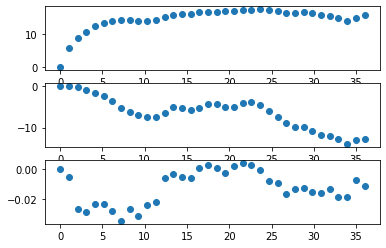

[None, None, None, 43, 61]
temps entre samples:  1.0155766010284424
[ 0.00000000e+00  0.00000000e+00  0.00000000e+00 -2.05461314e-01
 -1.29928836e+00 -3.17200439e+00 -6.12435023e+00 -1.10069192e+01
 -1.47861998e+01 -2.20627766e+01 -2.65449520e+01 -3.32375650e+01
 -3.47612474e+01 -4.08273896e+01 -4.76283152e+01 -5.37386438e+01
 -5.55553223e+01 -5.96886407e+01 -6.57691769e+01 -7.30116496e+01
 -7.45444044e+01 -7.75430455e+01 -8.34365800e+01 -9.06524005e+01
 -1.02683993e+02 -1.08915520e+02 -1.24834200e+02 -1.29760999e+02
 -1.40577134e+02 -1.53983394e+02 -1.65466878e+02 -1.74054755e+02
 -1.92803246e+02 -2.04580596e+02 -2.05512423e+02 -2.25461597e+02
 -2.46085438e+02]
[  0.           0.          -0.19255049  -1.03692308  -1.76690759
  -2.47546372  -3.53571716  -5.19173709  -6.2849092   -6.93481606
  -7.49661478  -7.4305911   -6.4489724   -4.99765282  -5.30101425
  -5.90000537  -5.4110102   -4.3545195   -4.38577288  -5.07498718
  -4.96885463  -4.00637261  -3.86462358  -4.55147601  -6.12243112

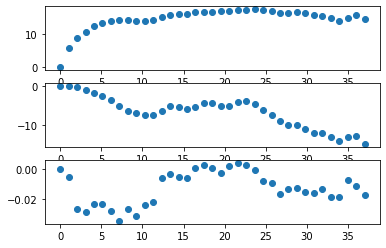

[None, None, None, 65, 58]
temps entre samples:  0.9528770446777344
[ 0.00000000e+00  0.00000000e+00  0.00000000e+00 -2.05461314e-01
 -1.29928836e+00 -3.17200439e+00 -6.12435023e+00 -1.10069192e+01
 -1.47861998e+01 -2.20627766e+01 -2.65449520e+01 -3.32375650e+01
 -3.47612474e+01 -4.08273896e+01 -4.76283152e+01 -5.37386438e+01
 -5.55553223e+01 -5.96886407e+01 -6.57691769e+01 -7.30116496e+01
 -7.45444044e+01 -7.75430455e+01 -8.34365800e+01 -9.06524005e+01
 -1.02683993e+02 -1.08915520e+02 -1.24834200e+02 -1.29760999e+02
 -1.40577134e+02 -1.53983394e+02 -1.65466878e+02 -1.74054755e+02
 -1.92803246e+02 -2.04580596e+02 -2.05512423e+02 -2.25461597e+02
 -2.46085438e+02 -2.55646665e+02]
[  0.           0.          -0.19255049  -1.03692308  -1.76690759
  -2.47546372  -3.53571716  -5.19173709  -6.2849092   -6.93481606
  -7.49661478  -7.4305911   -6.4489724   -4.99765282  -5.30101425
  -5.90000537  -5.4110102   -4.3545195   -4.38577288  -5.07498718
  -4.96885463  -4.00637261  -3.86462358  -4.55147

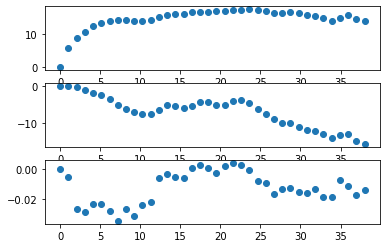

[None, None, None, 48, 54]
temps entre samples:  0.9734227657318115
[ 0.00000000e+00  0.00000000e+00  0.00000000e+00 -2.05461314e-01
 -1.29928836e+00 -3.17200439e+00 -6.12435023e+00 -1.10069192e+01
 -1.47861998e+01 -2.20627766e+01 -2.65449520e+01 -3.32375650e+01
 -3.47612474e+01 -4.08273896e+01 -4.76283152e+01 -5.37386438e+01
 -5.55553223e+01 -5.96886407e+01 -6.57691769e+01 -7.30116496e+01
 -7.45444044e+01 -7.75430455e+01 -8.34365800e+01 -9.06524005e+01
 -1.02683993e+02 -1.08915520e+02 -1.24834200e+02 -1.29760999e+02
 -1.40577134e+02 -1.53983394e+02 -1.65466878e+02 -1.74054755e+02
 -1.92803246e+02 -2.04580596e+02 -2.05512423e+02 -2.25461597e+02
 -2.46085438e+02 -2.55646665e+02 -2.72165140e+02]
[  0.           0.          -0.19255049  -1.03692308  -1.76690759
  -2.47546372  -3.53571716  -5.19173709  -6.2849092   -6.93481606
  -7.49661478  -7.4305911   -6.4489724   -4.99765282  -5.30101425
  -5.90000537  -5.4110102   -4.3545195   -4.38577288  -5.07498718
  -4.96885463  -4.00637261  -3.86

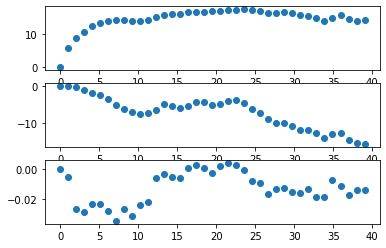

[None, None, None, 41, 56]
temps entre samples:  1.0486493110656738
[ 0.00000000e+00  0.00000000e+00  0.00000000e+00 -2.05461314e-01
 -1.29928836e+00 -3.17200439e+00 -6.12435023e+00 -1.10069192e+01
 -1.47861998e+01 -2.20627766e+01 -2.65449520e+01 -3.32375650e+01
 -3.47612474e+01 -4.08273896e+01 -4.76283152e+01 -5.37386438e+01
 -5.55553223e+01 -5.96886407e+01 -6.57691769e+01 -7.30116496e+01
 -7.45444044e+01 -7.75430455e+01 -8.34365800e+01 -9.06524005e+01
 -1.02683993e+02 -1.08915520e+02 -1.24834200e+02 -1.29760999e+02
 -1.40577134e+02 -1.53983394e+02 -1.65466878e+02 -1.74054755e+02
 -1.92803246e+02 -2.04580596e+02 -2.05512423e+02 -2.25461597e+02
 -2.46085438e+02 -2.55646665e+02 -2.72165140e+02 -2.94219934e+02]
[  0.           0.          -0.19255049  -1.03692308  -1.76690759
  -2.47546372  -3.53571716  -5.19173709  -6.2849092   -6.93481606
  -7.49661478  -7.4305911   -6.4489724   -4.99765282  -5.30101425
  -5.90000537  -5.4110102   -4.3545195   -4.38577288  -5.07498718
  -4.96885463  -4

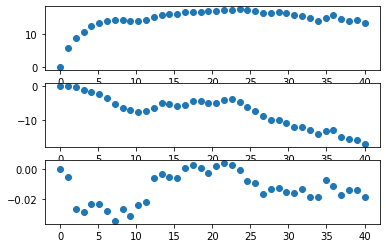

In [8]:

Ts = 0.001

KF = ExtendedKalmanFilterAstolfi()

KF.init_state_vector(0,0,0,0,0,0,0,0)

KF.set_time_stamp(time.time())

tab_posx = []
tab_posy = []
positionsx = []
positionsy = []

tab_vitd = []
tab_vitg = []
vitesser = []
vitessel = []

vitesse_x = []
vitesse_y = []
vitesse_angle = []
vitessex = []
vitessey = []
vitesseangle = []

vit_mesure_droite = []
vit_mesure_gauche = []
vitesse_commande = []

rota_mesure = []

compteur = 0


while(compteur<40):
    capteur = [None, None, None, control.read_motors_speed(node,client)[0],control.read_motors_speed(node,client)[1]]
    print(capteur)
    E = kalman_step_complet(capteur,KF)
    #print(E[0])
    control.set_motors(50,50,node)
    tab_posx.append(E[0])
    tab_posy.append(E[1])
    
    tab_vitd.append(E[3])
    tab_vitg.append(E[4])
    
    vitesse_x.append(E[5])
    vitesse_y.append(E[6])
    vitesse_angle.append(E[7])
    
    
    positionsx = np.squeeze(np.asarray(tab_posx))
    positionsy = np.squeeze(np.asarray(tab_posy))
    print(positionsy)
    
    vitessed = np.squeeze(np.asarray(tab_vitd))
    vitesseg = np.squeeze(np.asarray(tab_vitg))
    
    vitessex = np.squeeze(np.asarray(vitesse_x))
    vitessey = np.squeeze(np.asarray(vitesse_y))
    vitesseangle= np.squeeze(np.asarray(vitesse_angle))

    
    t = np.linspace(0,compteur+1,compteur+1)
    
    plt.subplot(3, 1, 1)
    plt.scatter(t,vitessex)

    
    vitesseg = np.squeeze(np.asarray(tab_vitg))
    plt.subplot(3, 1, 2)
    plt.scatter(t,vitessey)
    
    plt.subplot(3, 1, 3)
    plt.scatter(t,vitesseangle)

    print(vitessey)

    plt.show()


    
   # plt.plot(positionsx,positionsy)
    await client.sleep(Ts)
    compteur += 1
    
#    ax = plt.subplot(1, 1, 1)

    
    

control.set_motors(0,0,node)


[None, None, None, 40, 58]
temps entre samples:  0.6237154006958008
0.0
1
[matrix([[0.]])]


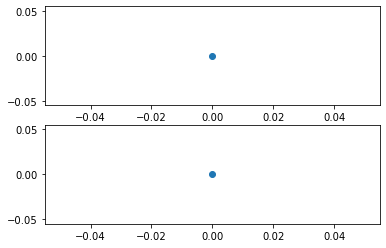

[None, None, None, 45, 57]
temps entre samples:  0.9890549182891846
[0. 0.]
2
[matrix([[0.]]), matrix([[-2.3764885]])]


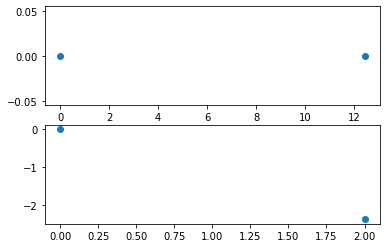

[None, None, None, 40, 62]
temps entre samples:  0.9838204383850098
[0. 0. 0.]
3
[matrix([[0.]]), matrix([[-2.3764885]]), matrix([[-6.16299914]])]


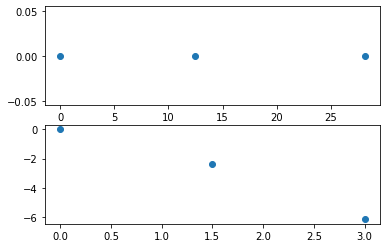

[None, None, None, 72, 47]
temps entre samples:  0.9269464015960693
[ 0.          0.          0.         -0.88765565]
4
[matrix([[0.]]), matrix([[-2.3764885]]), matrix([[-6.16299914]]), matrix([[-3.87813952]])]


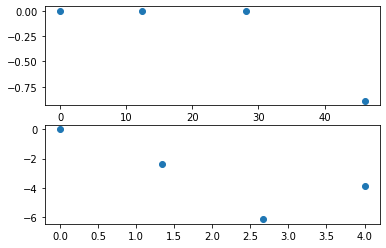

[None, None, None, 51, 62]
temps entre samples:  0.9522066116333008
[ 0.          0.          0.         -0.88765565 -3.44335349]
5
[matrix([[0.]]), matrix([[-2.3764885]]), matrix([[-6.16299914]]), matrix([[-3.87813952]]), matrix([[-6.00672267]])]


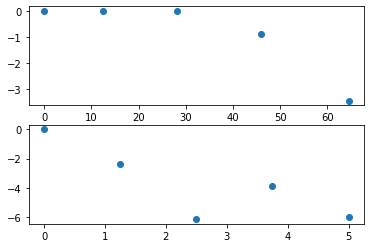

[None, None, None, 44, 49]
temps entre samples:  0.9301004409790039
[ 0.          0.          0.         -0.88765565 -3.44335349 -5.67164607]
6
[matrix([[0.]]), matrix([[-2.3764885]]), matrix([[-6.16299914]]), matrix([[-3.87813952]]), matrix([[-6.00672267]]), matrix([[-7.19685671]])]


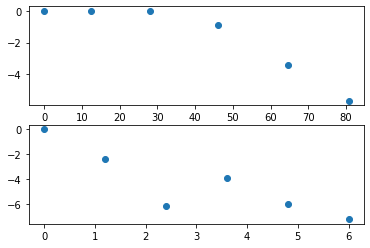

[None, None, None, 49, 44]
temps entre samples:  1.0025553703308105
[ 0.          0.          0.         -0.88765565 -3.44335349 -5.67164607
 -8.4584856 ]
7
[matrix([[0.]]), matrix([[-2.3764885]]), matrix([[-6.16299914]]), matrix([[-3.87813952]]), matrix([[-6.00672267]]), matrix([[-7.19685671]]), matrix([[-6.81144175]])]


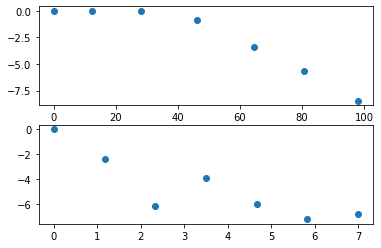

[None, None, None, 51, 52]
temps entre samples:  0.9586923122406006
[  0.           0.           0.          -0.88765565  -3.44335349
  -5.67164607  -8.4584856  -11.95331784]
8
[matrix([[0.]]), matrix([[-2.3764885]]), matrix([[-6.16299914]]), matrix([[-3.87813952]]), matrix([[-6.00672267]]), matrix([[-7.19685671]]), matrix([[-6.81144175]]), matrix([[-7.2658147]])]


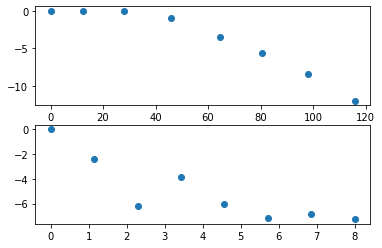

[None, None, None, 40, 52]
temps entre samples:  0.9688196182250977
[  0.           0.           0.          -0.88765565  -3.44335349
  -5.67164607  -8.4584856  -11.95331784 -16.77481714]
9
[matrix([[0.]]), matrix([[-2.3764885]]), matrix([[-6.16299914]]), matrix([[-3.87813952]]), matrix([[-6.00672267]]), matrix([[-7.19685671]]), matrix([[-6.81144175]]), matrix([[-7.2658147]]), matrix([[-9.61601593]])]


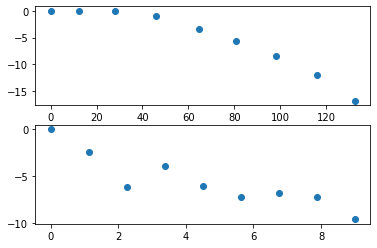

[None, None, None, 60, 57]
temps entre samples:  0.9281704425811768
[  0.           0.           0.          -0.88765565  -3.44335349
  -5.67164607  -8.4584856  -11.95331784 -16.77481714 -20.37838994]
10
[matrix([[0.]]), matrix([[-2.3764885]]), matrix([[-6.16299914]]), matrix([[-3.87813952]]), matrix([[-6.00672267]]), matrix([[-7.19685671]]), matrix([[-6.81144175]]), matrix([[-7.2658147]]), matrix([[-9.61601593]]), matrix([[-9.29251055]])]


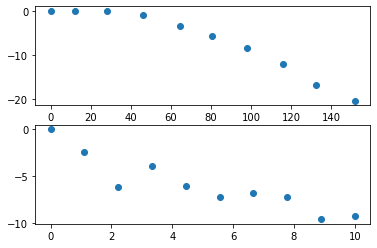

[None, None, None, 36, 44]
temps entre samples:  0.9308712482452393
[  0.           0.           0.          -0.88765565  -3.44335349
  -5.67164607  -8.4584856  -11.95331784 -16.77481714 -20.37838994
 -26.01813757]
11
[matrix([[0.]]), matrix([[-2.3764885]]), matrix([[-6.16299914]]), matrix([[-3.87813952]]), matrix([[-6.00672267]]), matrix([[-7.19685671]]), matrix([[-6.81144175]]), matrix([[-7.2658147]]), matrix([[-9.61601593]]), matrix([[-9.29251055]]), matrix([[-10.92885203]])]


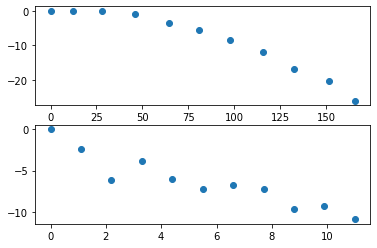

[None, None, None, 79, 45]
temps entre samples:  0.9267802238464355
[  0.           0.           0.          -0.88765565  -3.44335349
  -5.67164607  -8.4584856  -11.95331784 -16.77481714 -20.37838994
 -26.01813757 -24.77669396]
12
[matrix([[0.]]), matrix([[-2.3764885]]), matrix([[-6.16299914]]), matrix([[-3.87813952]]), matrix([[-6.00672267]]), matrix([[-7.19685671]]), matrix([[-6.81144175]]), matrix([[-7.2658147]]), matrix([[-9.61601593]]), matrix([[-9.29251055]]), matrix([[-10.92885203]]), matrix([[-4.94917228]])]


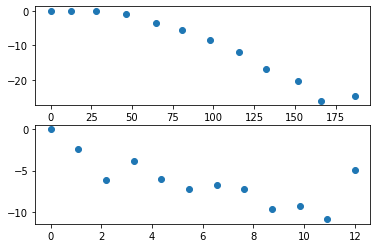

[None, None, None, 46, 45]
temps entre samples:  0.9820418357849121
[  0.           0.           0.          -0.88765565  -3.44335349
  -5.67164607  -8.4584856  -11.95331784 -16.77481714 -20.37838994
 -26.01813757 -24.77669396 -29.28868196]
13
[matrix([[0.]]), matrix([[-2.3764885]]), matrix([[-6.16299914]]), matrix([[-3.87813952]]), matrix([[-6.00672267]]), matrix([[-7.19685671]]), matrix([[-6.81144175]]), matrix([[-7.2658147]]), matrix([[-9.61601593]]), matrix([[-9.29251055]]), matrix([[-10.92885203]]), matrix([[-4.94917228]]), matrix([[-4.8560243]])]


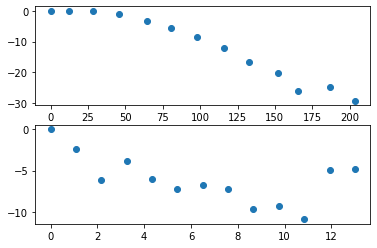

[None, None, None, 43, 57]
temps entre samples:  0.9436812400817871
[  0.           0.           0.          -0.88765565  -3.44335349
  -5.67164607  -8.4584856  -11.95331784 -16.77481714 -20.37838994
 -26.01813757 -24.77669396 -29.28868196 -35.51007666]
14
[matrix([[0.]]), matrix([[-2.3764885]]), matrix([[-6.16299914]]), matrix([[-3.87813952]]), matrix([[-6.00672267]]), matrix([[-7.19685671]]), matrix([[-6.81144175]]), matrix([[-7.2658147]]), matrix([[-9.61601593]]), matrix([[-9.29251055]]), matrix([[-10.92885203]]), matrix([[-4.94917228]]), matrix([[-4.8560243]]), matrix([[-7.43967109]])]


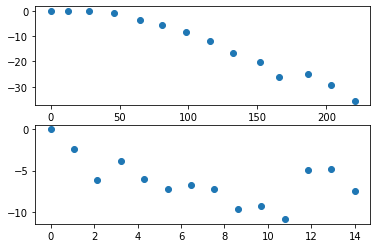

[None, None, None, 60, 58]
temps entre samples:  1.0042834281921387
[  0.           0.           0.          -0.88765565  -3.44335349
  -5.67164607  -8.4584856  -11.95331784 -16.77481714 -20.37838994
 -26.01813757 -24.77669396 -29.28868196 -35.51007666 -38.78814473]
15
[matrix([[0.]]), matrix([[-2.3764885]]), matrix([[-6.16299914]]), matrix([[-3.87813952]]), matrix([[-6.00672267]]), matrix([[-7.19685671]]), matrix([[-6.81144175]]), matrix([[-7.2658147]]), matrix([[-9.61601593]]), matrix([[-9.29251055]]), matrix([[-10.92885203]]), matrix([[-4.94917228]]), matrix([[-4.8560243]]), matrix([[-7.43967109]]), matrix([[-7.12297306]])]


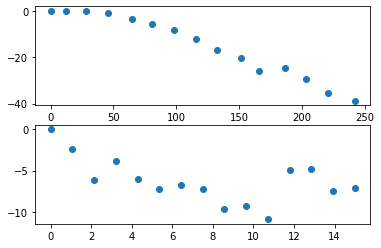

[None, None, None, 51, 58]
temps entre samples:  0.9739391803741455
[  0.           0.           0.          -0.88765565  -3.44335349
  -5.67164607  -8.4584856  -11.95331784 -16.77481714 -20.37838994
 -26.01813757 -24.77669396 -29.28868196 -35.51007666 -38.78814473
 -45.04460634]
16
[matrix([[0.]]), matrix([[-2.3764885]]), matrix([[-6.16299914]]), matrix([[-3.87813952]]), matrix([[-6.00672267]]), matrix([[-7.19685671]]), matrix([[-6.81144175]]), matrix([[-7.2658147]]), matrix([[-9.61601593]]), matrix([[-9.29251055]]), matrix([[-10.92885203]]), matrix([[-4.94917228]]), matrix([[-4.8560243]]), matrix([[-7.43967109]]), matrix([[-7.12297306]]), matrix([[-8.49695729]])]


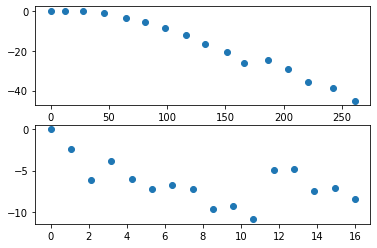

[None, None, None, 53, 44]
temps entre samples:  1.0062661170959473
[  0.           0.           0.          -0.88765565  -3.44335349
  -5.67164607  -8.4584856  -11.95331784 -16.77481714 -20.37838994
 -26.01813757 -24.77669396 -29.28868196 -35.51007666 -38.78814473
 -45.04460634 -46.83445934]
17
[matrix([[0.]]), matrix([[-2.3764885]]), matrix([[-6.16299914]]), matrix([[-3.87813952]]), matrix([[-6.00672267]]), matrix([[-7.19685671]]), matrix([[-6.81144175]]), matrix([[-7.2658147]]), matrix([[-9.61601593]]), matrix([[-9.29251055]]), matrix([[-10.92885203]]), matrix([[-4.94917228]]), matrix([[-4.8560243]]), matrix([[-7.43967109]]), matrix([[-7.12297306]]), matrix([[-8.49695729]]), matrix([[-6.88089347]])]


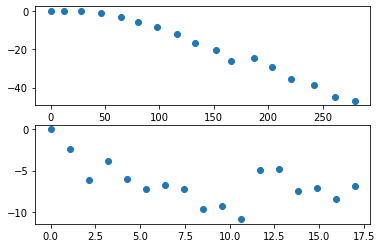

[None, None, None, 49, 64]
temps entre samples:  1.051321029663086
[  0.           0.           0.          -0.88765565  -3.44335349
  -5.67164607  -8.4584856  -11.95331784 -16.77481714 -20.37838994
 -26.01813757 -24.77669396 -29.28868196 -35.51007666 -38.78814473
 -45.04460634 -46.83445934 -56.88040287]
18
[matrix([[0.]]), matrix([[-2.3764885]]), matrix([[-6.16299914]]), matrix([[-3.87813952]]), matrix([[-6.00672267]]), matrix([[-7.19685671]]), matrix([[-6.81144175]]), matrix([[-7.2658147]]), matrix([[-9.61601593]]), matrix([[-9.29251055]]), matrix([[-10.92885203]]), matrix([[-4.94917228]]), matrix([[-4.8560243]]), matrix([[-7.43967109]]), matrix([[-7.12297306]]), matrix([[-8.49695729]]), matrix([[-6.88089347]]), matrix([[-9.81225394]])]


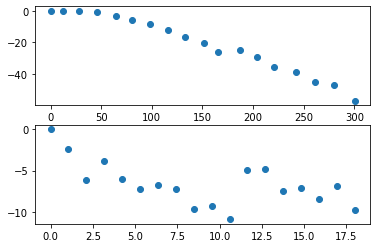

[None, None, None, 41, 40]
temps entre samples:  0.9276573657989502
[  0.           0.           0.          -0.88765565  -3.44335349
  -5.67164607  -8.4584856  -11.95331784 -16.77481714 -20.37838994
 -26.01813757 -24.77669396 -29.28868196 -35.51007666 -38.78814473
 -45.04460634 -46.83445934 -56.88040287 -60.47101083]
19
[matrix([[0.]]), matrix([[-2.3764885]]), matrix([[-6.16299914]]), matrix([[-3.87813952]]), matrix([[-6.00672267]]), matrix([[-7.19685671]]), matrix([[-6.81144175]]), matrix([[-7.2658147]]), matrix([[-9.61601593]]), matrix([[-9.29251055]]), matrix([[-10.92885203]]), matrix([[-4.94917228]]), matrix([[-4.8560243]]), matrix([[-7.43967109]]), matrix([[-7.12297306]]), matrix([[-8.49695729]]), matrix([[-6.88089347]]), matrix([[-9.81225394]]), matrix([[-9.66418609]])]


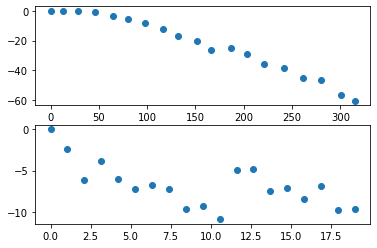

[None, None, None, 53, 51]
temps entre samples:  0.9745466709136963
[  0.           0.           0.          -0.88765565  -3.44335349
  -5.67164607  -8.4584856  -11.95331784 -16.77481714 -20.37838994
 -26.01813757 -24.77669396 -29.28868196 -35.51007666 -38.78814473
 -45.04460634 -46.83445934 -56.88040287 -60.47101083 -65.34411282]
20
[matrix([[0.]]), matrix([[-2.3764885]]), matrix([[-6.16299914]]), matrix([[-3.87813952]]), matrix([[-6.00672267]]), matrix([[-7.19685671]]), matrix([[-6.81144175]]), matrix([[-7.2658147]]), matrix([[-9.61601593]]), matrix([[-9.29251055]]), matrix([[-10.92885203]]), matrix([[-4.94917228]]), matrix([[-4.8560243]]), matrix([[-7.43967109]]), matrix([[-7.12297306]]), matrix([[-8.49695729]]), matrix([[-6.88089347]]), matrix([[-9.81225394]]), matrix([[-9.66418609]]), matrix([[-9.36951453]])]


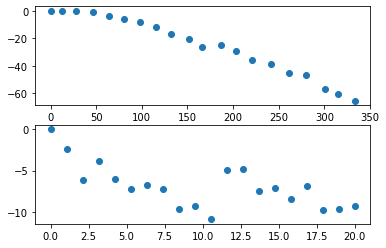

[None, None, None, 44, 40]
temps entre samples:  0.9776740074157715
[  0.           0.           0.          -0.88765565  -3.44335349
  -5.67164607  -8.4584856  -11.95331784 -16.77481714 -20.37838994
 -26.01813757 -24.77669396 -29.28868196 -35.51007666 -38.78814473
 -45.04460634 -46.83445934 -56.88040287 -60.47101083 -65.34411282
 -69.02518963]
21
[matrix([[0.]]), matrix([[-2.3764885]]), matrix([[-6.16299914]]), matrix([[-3.87813952]]), matrix([[-6.00672267]]), matrix([[-7.19685671]]), matrix([[-6.81144175]]), matrix([[-7.2658147]]), matrix([[-9.61601593]]), matrix([[-9.29251055]]), matrix([[-10.92885203]]), matrix([[-4.94917228]]), matrix([[-4.8560243]]), matrix([[-7.43967109]]), matrix([[-7.12297306]]), matrix([[-8.49695729]]), matrix([[-6.88089347]]), matrix([[-9.81225394]]), matrix([[-9.66418609]]), matrix([[-9.36951453]]), matrix([[-8.67675175]])]


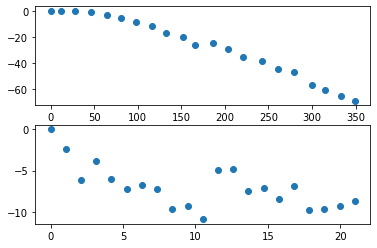

[None, None, None, 49, 46]
temps entre samples:  0.9592947959899902
[  0.           0.           0.          -0.88765565  -3.44335349
  -5.67164607  -8.4584856  -11.95331784 -16.77481714 -20.37838994
 -26.01813757 -24.77669396 -29.28868196 -35.51007666 -38.78814473
 -45.04460634 -46.83445934 -56.88040287 -60.47101083 -65.34411282
 -69.02518963 -73.04012687]
22
[matrix([[0.]]), matrix([[-2.3764885]]), matrix([[-6.16299914]]), matrix([[-3.87813952]]), matrix([[-6.00672267]]), matrix([[-7.19685671]]), matrix([[-6.81144175]]), matrix([[-7.2658147]]), matrix([[-9.61601593]]), matrix([[-9.29251055]]), matrix([[-10.92885203]]), matrix([[-4.94917228]]), matrix([[-4.8560243]]), matrix([[-7.43967109]]), matrix([[-7.12297306]]), matrix([[-8.49695729]]), matrix([[-6.88089347]]), matrix([[-9.81225394]]), matrix([[-9.66418609]]), matrix([[-9.36951453]]), matrix([[-8.67675175]]), matrix([[-8.15064008]])]


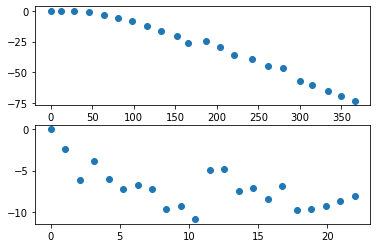

[None, None, None, 45, 47]
temps entre samples:  0.944415807723999
[  0.           0.           0.          -0.88765565  -3.44335349
  -5.67164607  -8.4584856  -11.95331784 -16.77481714 -20.37838994
 -26.01813757 -24.77669396 -29.28868196 -35.51007666 -38.78814473
 -45.04460634 -46.83445934 -56.88040287 -60.47101083 -65.34411282
 -69.02518963 -73.04012687 -78.58206697]
23
[matrix([[0.]]), matrix([[-2.3764885]]), matrix([[-6.16299914]]), matrix([[-3.87813952]]), matrix([[-6.00672267]]), matrix([[-7.19685671]]), matrix([[-6.81144175]]), matrix([[-7.2658147]]), matrix([[-9.61601593]]), matrix([[-9.29251055]]), matrix([[-10.92885203]]), matrix([[-4.94917228]]), matrix([[-4.8560243]]), matrix([[-7.43967109]]), matrix([[-7.12297306]]), matrix([[-8.49695729]]), matrix([[-6.88089347]]), matrix([[-9.81225394]]), matrix([[-9.66418609]]), matrix([[-9.36951453]]), matrix([[-8.67675175]]), matrix([[-8.15064008]]), matrix([[-8.55972588]])]


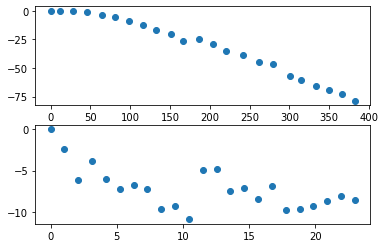

[None, None, None, 41, 45]
temps entre samples:  0.9585318565368652
[  0.           0.           0.          -0.88765565  -3.44335349
  -5.67164607  -8.4584856  -11.95331784 -16.77481714 -20.37838994
 -26.01813757 -24.77669396 -29.28868196 -35.51007666 -38.78814473
 -45.04460634 -46.83445934 -56.88040287 -60.47101083 -65.34411282
 -69.02518963 -73.04012687 -78.58206697 -84.79360474]
24
[matrix([[0.]]), matrix([[-2.3764885]]), matrix([[-6.16299914]]), matrix([[-3.87813952]]), matrix([[-6.00672267]]), matrix([[-7.19685671]]), matrix([[-6.81144175]]), matrix([[-7.2658147]]), matrix([[-9.61601593]]), matrix([[-9.29251055]]), matrix([[-10.92885203]]), matrix([[-4.94917228]]), matrix([[-4.8560243]]), matrix([[-7.43967109]]), matrix([[-7.12297306]]), matrix([[-8.49695729]]), matrix([[-6.88089347]]), matrix([[-9.81225394]]), matrix([[-9.66418609]]), matrix([[-9.36951453]]), matrix([[-8.67675175]]), matrix([[-8.15064008]]), matrix([[-8.55972588]]), matrix([[-9.34712088]])]


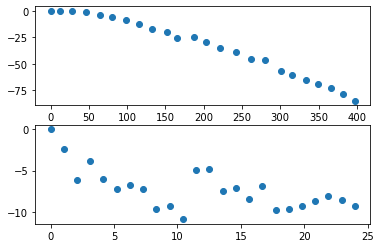

[None, None, None, 39, 44]
temps entre samples:  0.991934061050415
[  0.           0.           0.          -0.88765565  -3.44335349
  -5.67164607  -8.4584856  -11.95331784 -16.77481714 -20.37838994
 -26.01813757 -24.77669396 -29.28868196 -35.51007666 -38.78814473
 -45.04460634 -46.83445934 -56.88040287 -60.47101083 -65.34411282
 -69.02518963 -73.04012687 -78.58206697 -84.79360474 -91.76757413]
25
[matrix([[0.]]), matrix([[-2.3764885]]), matrix([[-6.16299914]]), matrix([[-3.87813952]]), matrix([[-6.00672267]]), matrix([[-7.19685671]]), matrix([[-6.81144175]]), matrix([[-7.2658147]]), matrix([[-9.61601593]]), matrix([[-9.29251055]]), matrix([[-10.92885203]]), matrix([[-4.94917228]]), matrix([[-4.8560243]]), matrix([[-7.43967109]]), matrix([[-7.12297306]]), matrix([[-8.49695729]]), matrix([[-6.88089347]]), matrix([[-9.81225394]]), matrix([[-9.66418609]]), matrix([[-9.36951453]]), matrix([[-8.67675175]]), matrix([[-8.15064008]]), matrix([[-8.55972588]]), matrix([[-9.34712088]]), matrix([[

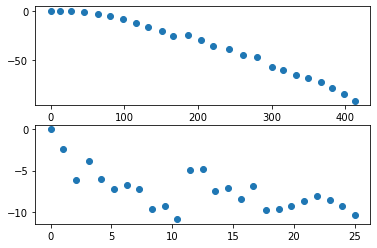

[None, None, None, 71, 39]
temps entre samples:  0.9579732418060303
[  0.           0.           0.          -0.88765565  -3.44335349
  -5.67164607  -8.4584856  -11.95331784 -16.77481714 -20.37838994
 -26.01813757 -24.77669396 -29.28868196 -35.51007666 -38.78814473
 -45.04460634 -46.83445934 -56.88040287 -60.47101083 -65.34411282
 -69.02518963 -73.04012687 -78.58206697 -84.79360474 -91.76757413
 -83.95288326]
26
[matrix([[0.]]), matrix([[-2.3764885]]), matrix([[-6.16299914]]), matrix([[-3.87813952]]), matrix([[-6.00672267]]), matrix([[-7.19685671]]), matrix([[-6.81144175]]), matrix([[-7.2658147]]), matrix([[-9.61601593]]), matrix([[-9.29251055]]), matrix([[-10.92885203]]), matrix([[-4.94917228]]), matrix([[-4.8560243]]), matrix([[-7.43967109]]), matrix([[-7.12297306]]), matrix([[-8.49695729]]), matrix([[-6.88089347]]), matrix([[-9.81225394]]), matrix([[-9.66418609]]), matrix([[-9.36951453]]), matrix([[-8.67675175]]), matrix([[-8.15064008]]), matrix([[-8.55972588]]), matrix([[-9.3471208

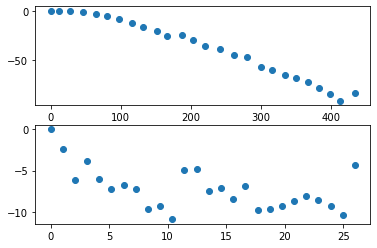

[None, None, None, 50, 45]
temps entre samples:  0.918165922164917
[  0.           0.           0.          -0.88765565  -3.44335349
  -5.67164607  -8.4584856  -11.95331784 -16.77481714 -20.37838994
 -26.01813757 -24.77669396 -29.28868196 -35.51007666 -38.78814473
 -45.04460634 -46.83445934 -56.88040287 -60.47101083 -65.34411282
 -69.02518963 -73.04012687 -78.58206697 -84.79360474 -91.76757413
 -83.95288326 -86.89857567]
27
[matrix([[0.]]), matrix([[-2.3764885]]), matrix([[-6.16299914]]), matrix([[-3.87813952]]), matrix([[-6.00672267]]), matrix([[-7.19685671]]), matrix([[-6.81144175]]), matrix([[-7.2658147]]), matrix([[-9.61601593]]), matrix([[-9.29251055]]), matrix([[-10.92885203]]), matrix([[-4.94917228]]), matrix([[-4.8560243]]), matrix([[-7.43967109]]), matrix([[-7.12297306]]), matrix([[-8.49695729]]), matrix([[-6.88089347]]), matrix([[-9.81225394]]), matrix([[-9.66418609]]), matrix([[-9.36951453]]), matrix([[-8.67675175]]), matrix([[-8.15064008]]), matrix([[-8.55972588]]), matrix(

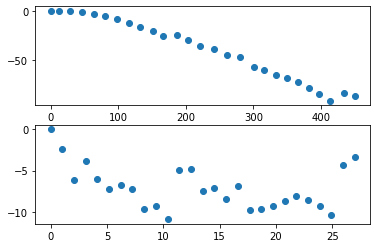

[None, None, None, 59, 61]
temps entre samples:  0.916571855545044
[  0.           0.           0.          -0.88765565  -3.44335349
  -5.67164607  -8.4584856  -11.95331784 -16.77481714 -20.37838994
 -26.01813757 -24.77669396 -29.28868196 -35.51007666 -38.78814473
 -45.04460634 -46.83445934 -56.88040287 -60.47101083 -65.34411282
 -69.02518963 -73.04012687 -78.58206697 -84.79360474 -91.76757413
 -83.95288326 -86.89857567 -91.47714375]
28
[matrix([[0.]]), matrix([[-2.3764885]]), matrix([[-6.16299914]]), matrix([[-3.87813952]]), matrix([[-6.00672267]]), matrix([[-7.19685671]]), matrix([[-6.81144175]]), matrix([[-7.2658147]]), matrix([[-9.61601593]]), matrix([[-9.29251055]]), matrix([[-10.92885203]]), matrix([[-4.94917228]]), matrix([[-4.8560243]]), matrix([[-7.43967109]]), matrix([[-7.12297306]]), matrix([[-8.49695729]]), matrix([[-6.88089347]]), matrix([[-9.81225394]]), matrix([[-9.66418609]]), matrix([[-9.36951453]]), matrix([[-8.67675175]]), matrix([[-8.15064008]]), matrix([[-8.5597258

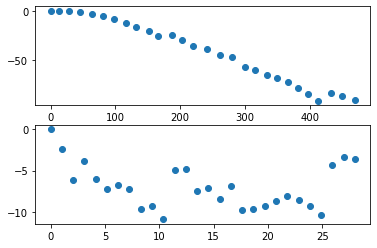

[None, None, None, 44, 43]
temps entre samples:  1.0037257671356201
[  0.           0.           0.          -0.88765565  -3.44335349
  -5.67164607  -8.4584856  -11.95331784 -16.77481714 -20.37838994
 -26.01813757 -24.77669396 -29.28868196 -35.51007666 -38.78814473
 -45.04460634 -46.83445934 -56.88040287 -60.47101083 -65.34411282
 -69.02518963 -73.04012687 -78.58206697 -84.79360474 -91.76757413
 -83.95288326 -86.89857567 -91.47714375 -93.96121471]
29
[matrix([[0.]]), matrix([[-2.3764885]]), matrix([[-6.16299914]]), matrix([[-3.87813952]]), matrix([[-6.00672267]]), matrix([[-7.19685671]]), matrix([[-6.81144175]]), matrix([[-7.2658147]]), matrix([[-9.61601593]]), matrix([[-9.29251055]]), matrix([[-10.92885203]]), matrix([[-4.94917228]]), matrix([[-4.8560243]]), matrix([[-7.43967109]]), matrix([[-7.12297306]]), matrix([[-8.49695729]]), matrix([[-6.88089347]]), matrix([[-9.81225394]]), matrix([[-9.66418609]]), matrix([[-9.36951453]]), matrix([[-8.67675175]]), matrix([[-8.15064008]]), matri

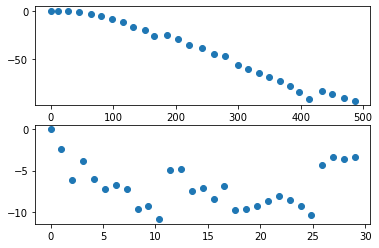

[None, None, None, 57, 41]
temps entre samples:  0.9124910831451416
[  0.           0.           0.          -0.88765565  -3.44335349
  -5.67164607  -8.4584856  -11.95331784 -16.77481714 -20.37838994
 -26.01813757 -24.77669396 -29.28868196 -35.51007666 -38.78814473
 -45.04460634 -46.83445934 -56.88040287 -60.47101083 -65.34411282
 -69.02518963 -73.04012687 -78.58206697 -84.79360474 -91.76757413
 -83.95288326 -86.89857567 -91.47714375 -93.96121471 -89.84685425]
30
[matrix([[0.]]), matrix([[-2.3764885]]), matrix([[-6.16299914]]), matrix([[-3.87813952]]), matrix([[-6.00672267]]), matrix([[-7.19685671]]), matrix([[-6.81144175]]), matrix([[-7.2658147]]), matrix([[-9.61601593]]), matrix([[-9.29251055]]), matrix([[-10.92885203]]), matrix([[-4.94917228]]), matrix([[-4.8560243]]), matrix([[-7.43967109]]), matrix([[-7.12297306]]), matrix([[-8.49695729]]), matrix([[-6.88089347]]), matrix([[-9.81225394]]), matrix([[-9.66418609]]), matrix([[-9.36951453]]), matrix([[-8.67675175]]), matrix([[-8.15064

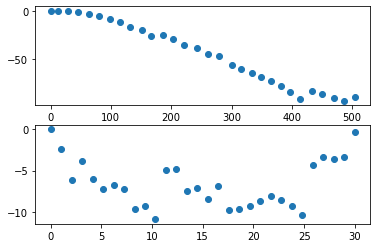

[None, None, None, 51, 42]
temps entre samples:  0.909808874130249
[  0.           0.           0.          -0.88765565  -3.44335349
  -5.67164607  -8.4584856  -11.95331784 -16.77481714 -20.37838994
 -26.01813757 -24.77669396 -29.28868196 -35.51007666 -38.78814473
 -45.04460634 -46.83445934 -56.88040287 -60.47101083 -65.34411282
 -69.02518963 -73.04012687 -78.58206697 -84.79360474 -91.76757413
 -83.95288326 -86.89857567 -91.47714375 -93.96121471 -89.84685425
 -88.36386788]
31
[matrix([[0.]]), matrix([[-2.3764885]]), matrix([[-6.16299914]]), matrix([[-3.87813952]]), matrix([[-6.00672267]]), matrix([[-7.19685671]]), matrix([[-6.81144175]]), matrix([[-7.2658147]]), matrix([[-9.61601593]]), matrix([[-9.29251055]]), matrix([[-10.92885203]]), matrix([[-4.94917228]]), matrix([[-4.8560243]]), matrix([[-7.43967109]]), matrix([[-7.12297306]]), matrix([[-8.49695729]]), matrix([[-6.88089347]]), matrix([[-9.81225394]]), matrix([[-9.66418609]]), matrix([[-9.36951453]]), matrix([[-8.67675175]]), matr

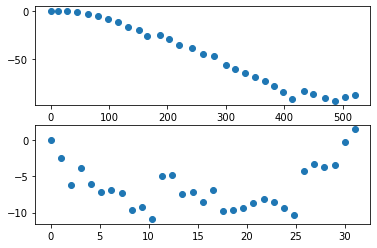

[None, None, None, 58, 59]
temps entre samples:  0.9412684440612793
[  0.           0.           0.          -0.88765565  -3.44335349
  -5.67164607  -8.4584856  -11.95331784 -16.77481714 -20.37838994
 -26.01813757 -24.77669396 -29.28868196 -35.51007666 -38.78814473
 -45.04460634 -46.83445934 -56.88040287 -60.47101083 -65.34411282
 -69.02518963 -73.04012687 -78.58206697 -84.79360474 -91.76757413
 -83.95288326 -86.89857567 -91.47714375 -93.96121471 -89.84685425
 -88.36386788 -90.59311293]
32
[matrix([[0.]]), matrix([[-2.3764885]]), matrix([[-6.16299914]]), matrix([[-3.87813952]]), matrix([[-6.00672267]]), matrix([[-7.19685671]]), matrix([[-6.81144175]]), matrix([[-7.2658147]]), matrix([[-9.61601593]]), matrix([[-9.29251055]]), matrix([[-10.92885203]]), matrix([[-4.94917228]]), matrix([[-4.8560243]]), matrix([[-7.43967109]]), matrix([[-7.12297306]]), matrix([[-8.49695729]]), matrix([[-6.88089347]]), matrix([[-9.81225394]]), matrix([[-9.66418609]]), matrix([[-9.36951453]]), matrix([[-8.676

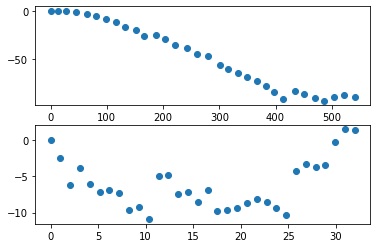

[None, None, None, 61, 54]
temps entre samples:  0.9222650527954102
[  0.           0.           0.          -0.88765565  -3.44335349
  -5.67164607  -8.4584856  -11.95331784 -16.77481714 -20.37838994
 -26.01813757 -24.77669396 -29.28868196 -35.51007666 -38.78814473
 -45.04460634 -46.83445934 -56.88040287 -60.47101083 -65.34411282
 -69.02518963 -73.04012687 -78.58206697 -84.79360474 -91.76757413
 -83.95288326 -86.89857567 -91.47714375 -93.96121471 -89.84685425
 -88.36386788 -90.59311293 -88.41353717]
33
[matrix([[0.]]), matrix([[-2.3764885]]), matrix([[-6.16299914]]), matrix([[-3.87813952]]), matrix([[-6.00672267]]), matrix([[-7.19685671]]), matrix([[-6.81144175]]), matrix([[-7.2658147]]), matrix([[-9.61601593]]), matrix([[-9.29251055]]), matrix([[-10.92885203]]), matrix([[-4.94917228]]), matrix([[-4.8560243]]), matrix([[-7.43967109]]), matrix([[-7.12297306]]), matrix([[-8.49695729]]), matrix([[-6.88089347]]), matrix([[-9.81225394]]), matrix([[-9.66418609]]), matrix([[-9.36951453]]), ma

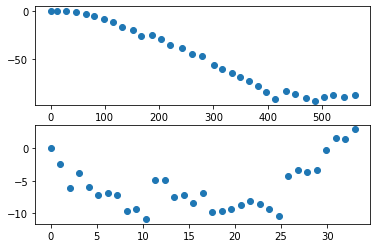

[None, None, None, 41, 43]
temps entre samples:  0.9239656925201416
[  0.           0.           0.          -0.88765565  -3.44335349
  -5.67164607  -8.4584856  -11.95331784 -16.77481714 -20.37838994
 -26.01813757 -24.77669396 -29.28868196 -35.51007666 -38.78814473
 -45.04460634 -46.83445934 -56.88040287 -60.47101083 -65.34411282
 -69.02518963 -73.04012687 -78.58206697 -84.79360474 -91.76757413
 -83.95288326 -86.89857567 -91.47714375 -93.96121471 -89.84685425
 -88.36386788 -90.59311293 -88.41353717 -89.66061673]
34
[matrix([[0.]]), matrix([[-2.3764885]]), matrix([[-6.16299914]]), matrix([[-3.87813952]]), matrix([[-6.00672267]]), matrix([[-7.19685671]]), matrix([[-6.81144175]]), matrix([[-7.2658147]]), matrix([[-9.61601593]]), matrix([[-9.29251055]]), matrix([[-10.92885203]]), matrix([[-4.94917228]]), matrix([[-4.8560243]]), matrix([[-7.43967109]]), matrix([[-7.12297306]]), matrix([[-8.49695729]]), matrix([[-6.88089347]]), matrix([[-9.81225394]]), matrix([[-9.66418609]]), matrix([[-9.36

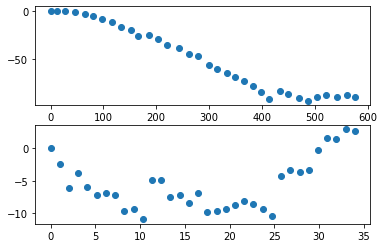

[None, None, None, 42, 40]
temps entre samples:  0.9747819900512695
[  0.           0.           0.          -0.88765565  -3.44335349
  -5.67164607  -8.4584856  -11.95331784 -16.77481714 -20.37838994
 -26.01813757 -24.77669396 -29.28868196 -35.51007666 -38.78814473
 -45.04460634 -46.83445934 -56.88040287 -60.47101083 -65.34411282
 -69.02518963 -73.04012687 -78.58206697 -84.79360474 -91.76757413
 -83.95288326 -86.89857567 -91.47714375 -93.96121471 -89.84685425
 -88.36386788 -90.59311293 -88.41353717 -89.66061673 -88.40449082]
35
[matrix([[0.]]), matrix([[-2.3764885]]), matrix([[-6.16299914]]), matrix([[-3.87813952]]), matrix([[-6.00672267]]), matrix([[-7.19685671]]), matrix([[-6.81144175]]), matrix([[-7.2658147]]), matrix([[-9.61601593]]), matrix([[-9.29251055]]), matrix([[-10.92885203]]), matrix([[-4.94917228]]), matrix([[-4.8560243]]), matrix([[-7.43967109]]), matrix([[-7.12297306]]), matrix([[-8.49695729]]), matrix([[-6.88089347]]), matrix([[-9.81225394]]), matrix([[-9.66418609]]), m

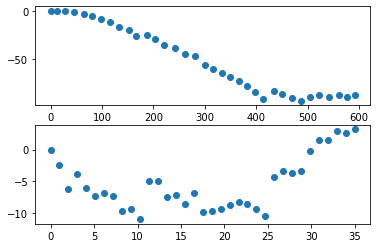

[None, None, None, 69, 47]
temps entre samples:  0.9247443675994873
[  0.           0.           0.          -0.88765565  -3.44335349
  -5.67164607  -8.4584856  -11.95331784 -16.77481714 -20.37838994
 -26.01813757 -24.77669396 -29.28868196 -35.51007666 -38.78814473
 -45.04460634 -46.83445934 -56.88040287 -60.47101083 -65.34411282
 -69.02518963 -73.04012687 -78.58206697 -84.79360474 -91.76757413
 -83.95288326 -86.89857567 -91.47714375 -93.96121471 -89.84685425
 -88.36386788 -90.59311293 -88.41353717 -89.66061673 -88.40449082
 -78.16283644]
36
[matrix([[0.]]), matrix([[-2.3764885]]), matrix([[-6.16299914]]), matrix([[-3.87813952]]), matrix([[-6.00672267]]), matrix([[-7.19685671]]), matrix([[-6.81144175]]), matrix([[-7.2658147]]), matrix([[-9.61601593]]), matrix([[-9.29251055]]), matrix([[-10.92885203]]), matrix([[-4.94917228]]), matrix([[-4.8560243]]), matrix([[-7.43967109]]), matrix([[-7.12297306]]), matrix([[-8.49695729]]), matrix([[-6.88089347]]), matrix([[-9.81225394]]), matrix([[-9.

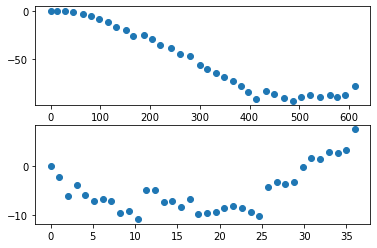

[None, None, None, 47, 63]
temps entre samples:  0.9281229972839355
[  0.           0.           0.          -0.88765565  -3.44335349
  -5.67164607  -8.4584856  -11.95331784 -16.77481714 -20.37838994
 -26.01813757 -24.77669396 -29.28868196 -35.51007666 -38.78814473
 -45.04460634 -46.83445934 -56.88040287 -60.47101083 -65.34411282
 -69.02518963 -73.04012687 -78.58206697 -84.79360474 -91.76757413
 -83.95288326 -86.89857567 -91.47714375 -93.96121471 -89.84685425
 -88.36386788 -90.59311293 -88.41353717 -89.66061673 -88.40449082
 -78.16283644 -85.03634056]
37
[matrix([[0.]]), matrix([[-2.3764885]]), matrix([[-6.16299914]]), matrix([[-3.87813952]]), matrix([[-6.00672267]]), matrix([[-7.19685671]]), matrix([[-6.81144175]]), matrix([[-7.2658147]]), matrix([[-9.61601593]]), matrix([[-9.29251055]]), matrix([[-10.92885203]]), matrix([[-4.94917228]]), matrix([[-4.8560243]]), matrix([[-7.43967109]]), matrix([[-7.12297306]]), matrix([[-8.49695729]]), matrix([[-6.88089347]]), matrix([[-9.81225394]]),

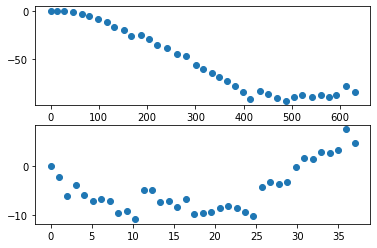

[None, None, None, 44, 57]
temps entre samples:  0.9562008380889893
[  0.           0.           0.          -0.88765565  -3.44335349
  -5.67164607  -8.4584856  -11.95331784 -16.77481714 -20.37838994
 -26.01813757 -24.77669396 -29.28868196 -35.51007666 -38.78814473
 -45.04460634 -46.83445934 -56.88040287 -60.47101083 -65.34411282
 -69.02518963 -73.04012687 -78.58206697 -84.79360474 -91.76757413
 -83.95288326 -86.89857567 -91.47714375 -93.96121471 -89.84685425
 -88.36386788 -90.59311293 -88.41353717 -89.66061673 -88.40449082
 -78.16283644 -85.03634056 -88.90168825]
38
[matrix([[0.]]), matrix([[-2.3764885]]), matrix([[-6.16299914]]), matrix([[-3.87813952]]), matrix([[-6.00672267]]), matrix([[-7.19685671]]), matrix([[-6.81144175]]), matrix([[-7.2658147]]), matrix([[-9.61601593]]), matrix([[-9.29251055]]), matrix([[-10.92885203]]), matrix([[-4.94917228]]), matrix([[-4.8560243]]), matrix([[-7.43967109]]), matrix([[-7.12297306]]), matrix([[-8.49695729]]), matrix([[-6.88089347]]), matrix([[-9

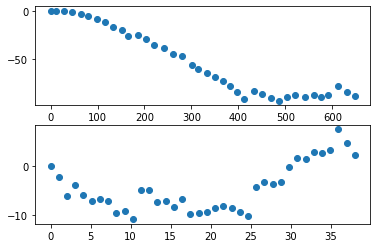

[None, None, None, 42, 57]
temps entre samples:  0.9541237354278564
[  0.           0.           0.          -0.88765565  -3.44335349
  -5.67164607  -8.4584856  -11.95331784 -16.77481714 -20.37838994
 -26.01813757 -24.77669396 -29.28868196 -35.51007666 -38.78814473
 -45.04460634 -46.83445934 -56.88040287 -60.47101083 -65.34411282
 -69.02518963 -73.04012687 -78.58206697 -84.79360474 -91.76757413
 -83.95288326 -86.89857567 -91.47714375 -93.96121471 -89.84685425
 -88.36386788 -90.59311293 -88.41353717 -89.66061673 -88.40449082
 -78.16283644 -85.03634056 -88.90168825 -94.57338707]
39
[matrix([[0.]]), matrix([[-2.3764885]]), matrix([[-6.16299914]]), matrix([[-3.87813952]]), matrix([[-6.00672267]]), matrix([[-7.19685671]]), matrix([[-6.81144175]]), matrix([[-7.2658147]]), matrix([[-9.61601593]]), matrix([[-9.29251055]]), matrix([[-10.92885203]]), matrix([[-4.94917228]]), matrix([[-4.8560243]]), matrix([[-7.43967109]]), matrix([[-7.12297306]]), matrix([[-8.49695729]]), matrix([[-6.88089347]])

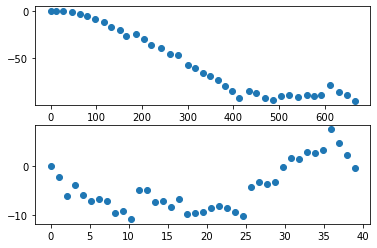

[None, None, None, 44, 51]
temps entre samples:  1.0145843029022217
[  0.           0.           0.          -0.88765565  -3.44335349
  -5.67164607  -8.4584856  -11.95331784 -16.77481714 -20.37838994
 -26.01813757 -24.77669396 -29.28868196 -35.51007666 -38.78814473
 -45.04460634 -46.83445934 -56.88040287 -60.47101083 -65.34411282
 -69.02518963 -73.04012687 -78.58206697 -84.79360474 -91.76757413
 -83.95288326 -86.89857567 -91.47714375 -93.96121471 -89.84685425
 -88.36386788 -90.59311293 -88.41353717 -89.66061673 -88.40449082
 -78.16283644 -85.03634056 -88.90168825 -94.57338707 -97.18982249]
40
[matrix([[0.]]), matrix([[-2.3764885]]), matrix([[-6.16299914]]), matrix([[-3.87813952]]), matrix([[-6.00672267]]), matrix([[-7.19685671]]), matrix([[-6.81144175]]), matrix([[-7.2658147]]), matrix([[-9.61601593]]), matrix([[-9.29251055]]), matrix([[-10.92885203]]), matrix([[-4.94917228]]), matrix([[-4.8560243]]), matrix([[-7.43967109]]), matrix([[-7.12297306]]), matrix([[-8.49695729]]), matrix([[-

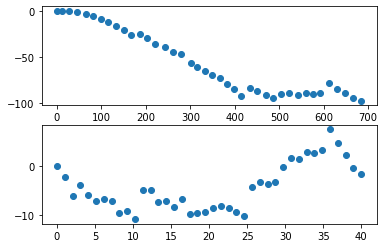

In [10]:

Ts = 0.001

KF = ExtendedKalmanFilterAstolfi()

KF.init_state_vector(0,0,0,0,0,0,0,0)

KF.set_time_stamp(time.time())

tab_posx = []
tab_posy = []
positionsx = []
positionsy = []

angles = []
angles_np = []

tab_vitd = []
tab_vitg = []
vitesser = []
vitessel = []

vit_mesure_droite = []
vit_mesure_gauche = []
vitesse_commande = []

rota_mesure = []

compteur = 0


while(compteur<40):
    capteur = [None, None, None, control.read_motors_speed(node,client)[0],control.read_motors_speed(node,client)[1]]
    print(capteur)
    E = kalman_step_complet(capteur,KF)
    #print(E[0])
    control.set_motors(50,50,node)
    tab_posx.append(E[0])
    tab_posy.append(E[1])
    
    tab_vitd.append(E[3])
    tab_vitg.append(E[4])
    
    angles.append(E[2]*180/3.14)
    anlges_np = np.squeeze(np.asarray(angles))
    
    positionsx = np.squeeze(np.asarray(tab_posx))
    positionsy = np.squeeze(np.asarray(tab_posy))
    print(positionsy)
    
    
    vitessed = np.squeeze(np.asarray(tab_vitd))
    vitesseg = np.squeeze(np.asarray(tab_vitg))

    
    t = np.linspace(0,compteur+1,compteur+1)
    print(len(t))
    
    plt.subplot(2, 1, 1)
    plt.scatter(positionsx,positionsy)

    
    vitesseg = np.squeeze(np.asarray(tab_vitg))
    print(angles)
    plt.subplot(2, 1, 2)
    plt.scatter(t,angles)
    

    plt.show()


    
   # plt.plot(positionsx,positionsy)
    await client.sleep(Ts)
    compteur += 1
    
#    ax = plt.subplot(1, 1, 1)

    
    

control.set_motors(0,0,node)


In [11]:
control.set_motors(0,0,node)

1639084430.0349


Exception in thread Thread-10:
Traceback (most recent call last):
  File "C:\Users\grebi\anaconda3\lib\threading.py", line 932, in _bootstrap_inner
    self.run()
  File "C:\Users\grebi\anaconda3\lib\threading.py", line 1254, in run
    self.function(*self.args, **self.kwargs)
  File "C:\Users\grebi\Bureau\Mobile Robotics\Projet\timer.py", line 16, in _run
    self.function(*self.args, **self.kwargs)
TypeError: 'matrix' object is not callable


STRAIGHT


Exception in thread Thread-11:
Traceback (most recent call last):
  File "C:\Users\grebi\anaconda3\lib\threading.py", line 932, in _bootstrap_inner
    self.run()
  File "C:\Users\grebi\anaconda3\lib\threading.py", line 1254, in run
    self.function(*self.args, **self.kwargs)
  File "C:\Users\grebi\Bureau\Mobile Robotics\Projet\timer.py", line 16, in _run
    self.function(*self.args, **self.kwargs)
TypeError: 'matrix' object is not callable
Exception in thread Thread-12:
Traceback (most recent call last):
  File "C:\Users\grebi\anaconda3\lib\threading.py", line 932, in _bootstrap_inner
    self.run()
  File "C:\Users\grebi\anaconda3\lib\threading.py", line 1254, in run
    self.function(*self.args, **self.kwargs)
  File "C:\Users\grebi\Bureau\Mobile Robotics\Projet\timer.py", line 16, in _run
    self.function(*self.args, **self.kwargs)
TypeError: 'matrix' object is not callable
Exception in thread Thread-13:
Traceback (most recent call last):
  File "C:\Users\grebi\anaconda3\lib\thr

Exception in thread Thread-30:
Traceback (most recent call last):
  File "C:\Users\grebi\anaconda3\lib\threading.py", line 932, in _bootstrap_inner
    self.run()
  File "C:\Users\grebi\anaconda3\lib\threading.py", line 1254, in run
    self.function(*self.args, **self.kwargs)
  File "C:\Users\grebi\Bureau\Mobile Robotics\Projet\timer.py", line 16, in _run
    self.function(*self.args, **self.kwargs)
TypeError: 'matrix' object is not callable


ROTATION


Exception in thread Thread-31:
Traceback (most recent call last):
  File "C:\Users\grebi\anaconda3\lib\threading.py", line 932, in _bootstrap_inner
    self.run()
  File "C:\Users\grebi\anaconda3\lib\threading.py", line 1254, in run
    self.function(*self.args, **self.kwargs)
  File "C:\Users\grebi\Bureau\Mobile Robotics\Projet\timer.py", line 16, in _run
    self.function(*self.args, **self.kwargs)
TypeError: 'matrix' object is not callable
Exception in thread Thread-32:
Traceback (most recent call last):
  File "C:\Users\grebi\anaconda3\lib\threading.py", line 932, in _bootstrap_inner
    self.run()
  File "C:\Users\grebi\anaconda3\lib\threading.py", line 1254, in run
    self.function(*self.args, **self.kwargs)
  File "C:\Users\grebi\Bureau\Mobile Robotics\Projet\timer.py", line 16, in _run
    self.function(*self.args, **self.kwargs)
TypeError: 'matrix' object is not callable
Exception in thread Thread-33:
Traceback (most recent call last):
  File "C:\Users\grebi\anaconda3\lib\thr

STRAIGHT


Exception in thread Thread-47:
Traceback (most recent call last):
  File "C:\Users\grebi\anaconda3\lib\threading.py", line 932, in _bootstrap_inner
    self.run()
  File "C:\Users\grebi\anaconda3\lib\threading.py", line 1254, in run
    self.function(*self.args, **self.kwargs)
  File "C:\Users\grebi\Bureau\Mobile Robotics\Projet\timer.py", line 16, in _run
    self.function(*self.args, **self.kwargs)
TypeError: 'matrix' object is not callable
Exception in thread Thread-48:
Traceback (most recent call last):
  File "C:\Users\grebi\anaconda3\lib\threading.py", line 932, in _bootstrap_inner
    self.run()
  File "C:\Users\grebi\anaconda3\lib\threading.py", line 1254, in run
    self.function(*self.args, **self.kwargs)
  File "C:\Users\grebi\Bureau\Mobile Robotics\Projet\timer.py", line 16, in _run
    self.function(*self.args, **self.kwargs)
TypeError: 'matrix' object is not callable
Exception in thread Thread-49:
Traceback (most recent call last):
  File "C:\Users\grebi\anaconda3\lib\thr

ROTATION


Exception in thread Thread-66:
Traceback (most recent call last):
  File "C:\Users\grebi\anaconda3\lib\threading.py", line 932, in _bootstrap_inner
    self.run()
  File "C:\Users\grebi\anaconda3\lib\threading.py", line 1254, in run
    self.function(*self.args, **self.kwargs)
  File "C:\Users\grebi\Bureau\Mobile Robotics\Projet\timer.py", line 16, in _run
    self.function(*self.args, **self.kwargs)
TypeError: 'matrix' object is not callable
Exception in thread Thread-67:
Traceback (most recent call last):
  File "C:\Users\grebi\anaconda3\lib\threading.py", line 932, in _bootstrap_inner
    self.run()
  File "C:\Users\grebi\anaconda3\lib\threading.py", line 1254, in run
    self.function(*self.args, **self.kwargs)
  File "C:\Users\grebi\Bureau\Mobile Robotics\Projet\timer.py", line 16, in _run
    self.function(*self.args, **self.kwargs)
TypeError: 'matrix' object is not callable
Exception in thread Thread-68:
Traceback (most recent call last):
  File "C:\Users\grebi\anaconda3\lib\thr

Exception in thread Thread-85:
Traceback (most recent call last):
  File "C:\Users\grebi\anaconda3\lib\threading.py", line 932, in _bootstrap_inner
    self.run()
  File "C:\Users\grebi\anaconda3\lib\threading.py", line 1254, in run
    self.function(*self.args, **self.kwargs)
  File "C:\Users\grebi\Bureau\Mobile Robotics\Projet\timer.py", line 16, in _run
    self.function(*self.args, **self.kwargs)
TypeError: 'matrix' object is not callable


STRAIGHT


Exception in thread Thread-86:
Traceback (most recent call last):
  File "C:\Users\grebi\anaconda3\lib\threading.py", line 932, in _bootstrap_inner
    self.run()
  File "C:\Users\grebi\anaconda3\lib\threading.py", line 1254, in run
    self.function(*self.args, **self.kwargs)
  File "C:\Users\grebi\Bureau\Mobile Robotics\Projet\timer.py", line 16, in _run
    self.function(*self.args, **self.kwargs)
TypeError: 'matrix' object is not callable
Exception in thread Thread-87:
Traceback (most recent call last):
  File "C:\Users\grebi\anaconda3\lib\threading.py", line 932, in _bootstrap_inner
    self.run()
  File "C:\Users\grebi\anaconda3\lib\threading.py", line 1254, in run
    self.function(*self.args, **self.kwargs)
  File "C:\Users\grebi\Bureau\Mobile Robotics\Projet\timer.py", line 16, in _run
    self.function(*self.args, **self.kwargs)
TypeError: 'matrix' object is not callable
Exception in thread Thread-88:
Traceback (most recent call last):
  File "C:\Users\grebi\anaconda3\lib\thr

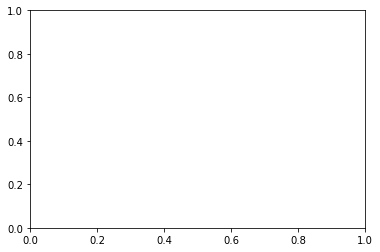

In [9]:
speed_conv_factor = 0.38;
marche_avant=True;
Ts = 0.1

KF = ExtendedKalmanFilterAstolfi()

KF.init_state_vector(0,0,3.14,0,0,0,0,0)

KF.set_time_stamp(time.time())


print(KF)
print(KF.get_time_stamp())

tab_etats = []
tab_etats_predits = []
tab_pos_misajour = []
tab_vit_misajour = []
avg_speed = []
speed_command = []
rota_command = []
rotation = False
Rthymio = 0.045 #A MODIFER
ts = time.time()  #temps initial pour premiere mesure
marq = time.time()

compteur = 0

get_data = []

#permet de passer a vitesse de commande à vitesse mm/s. 
marche_avant=True;
ax = plt.subplot(1, 1, 1)


if marche_avant:
    await node.wait_for_variables() # wait for Thymio variables values
    
    capteur = [None, None, None, control.read_motors_speed(node,client)[0],control.read_motors_speed(node,client)[1]]
    
    rt = RepeatedTimer(Ts, kalman_step_complet(capteur,KF)) # it auto-starts, no need of rt.start()
    
    try:
 # time.sleep would not work here, use asynchronous client.sleep method instead
        print('STRAIGHT')
        control.set_motors(20,50,node)
        TPS = time.time() 

        await client.sleep(2)
        print('ROTATION')
        rotation=True
        control.set_motors(50,-20,node)
        await client.sleep(1.7)
        
        print('STRAIGHT')
        rotation=False
        control.set_motors(50,50,node)
        await client.sleep(2)
        
        print('ROTATION')
        rotation=True
        control.set_motors(50,-50,node)
        await client.sleep(2)
        
        print('STRAIGHT')
        rotation=False
        control.set_motors(100,-100,node)
        await client.sleep(2)
        
        
    finally:
        rt.stop() # better in a try/finally block to make sure the program ends!
        control.set_motors(0,0,node)


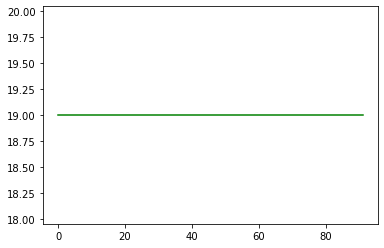

In [8]:
positions = np.squeeze(np.asarray(tab_pos_misajour))
#print(positions)
vitesses = np.squeeze(np.asarray(tab_vit_misajour))
#print(vitesses)
speed_conv_factor = 0.38;
vitesses_moy = np.squeeze(np.asarray(avg_speed))

#print(vitesses_moy)

command_pos = []
vit_command = []
pos_com_increments = []
for i in range(91):
    vit_command.append(50*speed_conv_factor)

a = np.squeeze(np.asarray(vit_command))
#print(vit_command)

pos_com_increments = a[20:]*(speed_conv_factor*Ts)
command_pos= np.cumsum(pos_com_increments)
#print(command_pos)

# increments de commande
#print(pos_com_increments)
# increments liés au capteur de vitesse
#print(pos_increments)

print()


#print(type(vitesses_moy))
pos_increments = vitesses_moy[20:]*(Ts)
odom_pos= np.cumsum(pos_increments)

#x = np.linspace(0, len(positions), len(positions))
#plt.plot(x,positions, "r", label="Kalman position")

#x = np.linspace(0, len(odom_pos), len(odom_pos))
#plt.plot(x, odom_pos, "b",label="Brute speed sensor")

#x = np.linspace(0, len(command_pos), len(command_pos))
#plt.plot(x, command_pos, "g", label="position ideale")

#plt.show()

#construction de la comparaison des vitesses

#vitesse dans etats
x = np.linspace(0, len(vitesses), len(vitesses))
plt.plot(x,vitesses, "r", label="Kalman position")

#vitesses captés bruts des capteurs
x = np.linspace(0, len(vitesses_moy), len(vitesses_moy))
plt.plot(x, vitesses_moy, "b", label="Brute speed sensor")

#print(vit_command)
x = np.linspace(0, len(vit_command), len(vit_command))
plt.plot(x, vit_command,"g", label="position ideale")

plt.show()

In [ ]:
ax = plt.subplot(1, 1, 1)
xpos = [row[0] for row in tab_pos_misajour]
ypos = [row[1] for row in tab_pos_misajour]
#print(ypos)
ax.scatter(xpos,ypos)

99
99
65.18358014337049


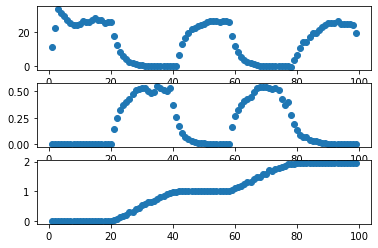

In [371]:
#vitesse straight
ax = plt.subplot(3, 1, 1)
xvit = [row[0] for row in tab_vit_misajour]
yvit = [row[1] for row in tab_vit_misajour]
temps = np.linspace(1,len(xvit),len(xvit))
print(len(temps))
print(len(xvit))
ax.scatter(temps,xvit)
#vitesse angulaire
ax = plt.subplot(3, 1, 2)
ax.scatter(temps,yvit)
ax = plt.subplot(3, 1, 3)
angle = [row[2] for row in tab_pos_misajour]
ax.scatter(temps,angle)
print(angle[60]*180/pi)

In [51]:
capteur = [None, None, None, control.read_motors_speed(node,client)[0],control.read_motors_speed(node,client)[1]]
print([capteur])

[[None, None, None, 0, 0]]


In [52]:
bool(capteur)

True

In [53]:
bool(capteur[0])

False

In [54]:
bool(capteur.index(0))

True

In [11]:
print(KF)